In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from fbprophet import Prophet
from math import sqrt
from sklearn.metrics import mean_squared_error
from pandas import Series
from matplotlib import pyplot

In [5]:
#reading dataframe
df = pd.read_csv('/home/abhishek/projects/carsalesprediction/newcarsalesnorway/norway_new_car_sales_by_make.csv')

In [6]:
df.head(5)

Year  Month        Make  Quantity   Pct
0  2007      1      Toyota      2884  22.7
1  2007      1  Volkswagen      2521  19.9
2  2007      1     Peugeot      1029   8.1
3  2007      1        Ford       870   6.9
4  2007      1       Volvo       693   5.5

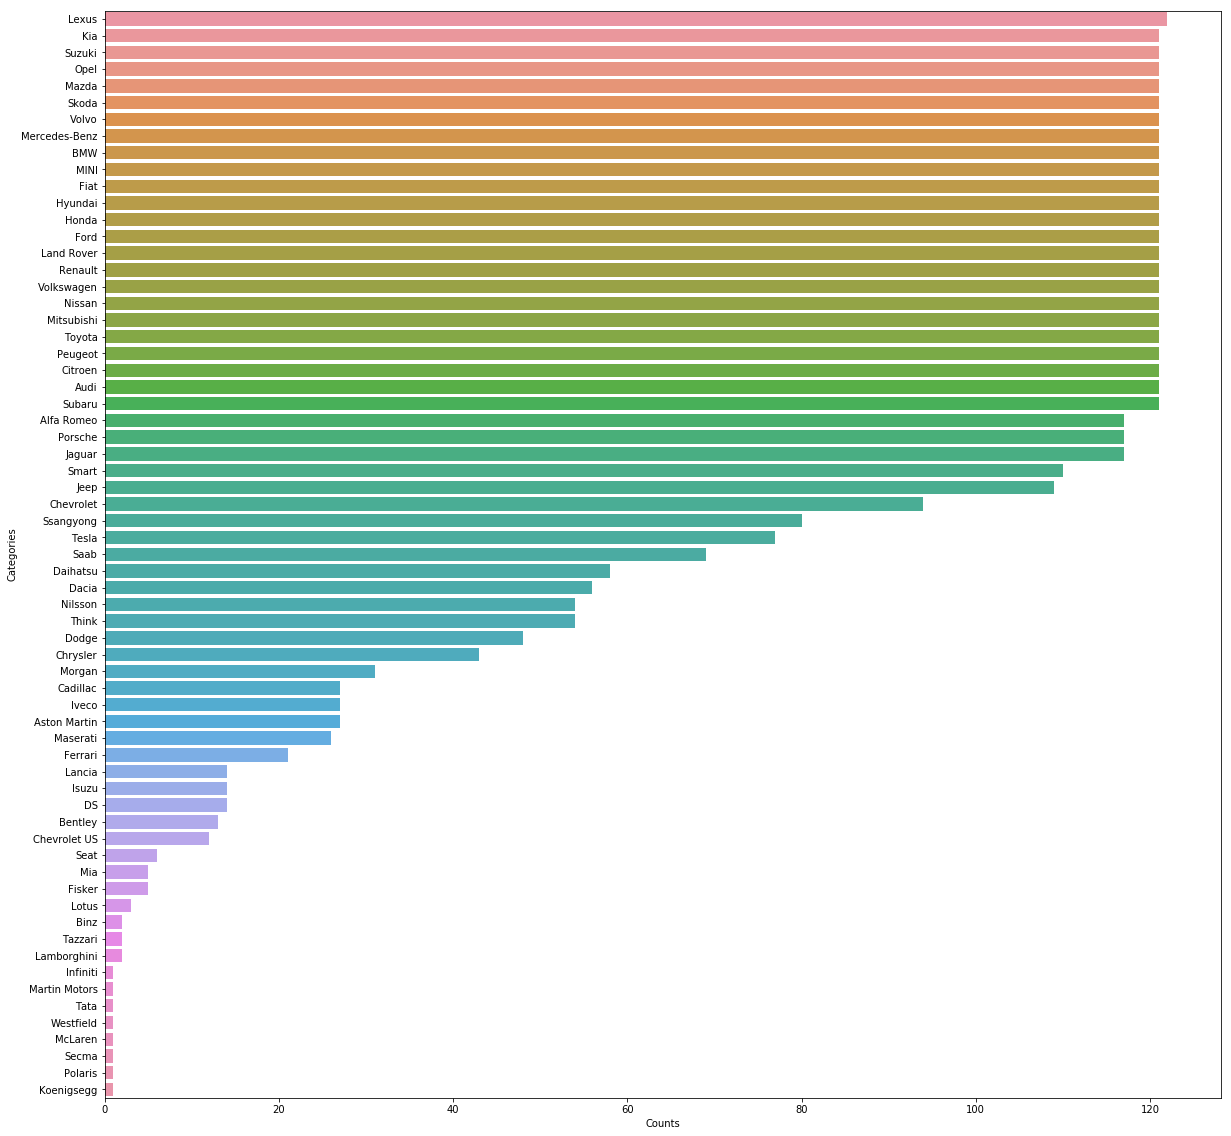

In [9]:
plt.figure(figsize = (20,20))
sns.barplot(df.Make.value_counts().values,df.Make.value_counts().index)
plt.xlabel("Counts")
plt.ylabel("Categories")
plt.show()


In [13]:
makes =  df.Make.value_counts().index

In [14]:
for x in makes :
  

Lexus
Kia
Suzuki
Opel
Mazda
Skoda
Volvo
Mercedes-Benz
BMW
MINI
Fiat
Hyundai
Honda
Ford
Land Rover
Renault
Volkswagen
Nissan
Mitsubishi
Toyota
Peugeot
Citroen
Audi
Subaru
Alfa Romeo
Porsche
Jaguar
Smart
Jeep
Chevrolet
Ssangyong
Tesla
Saab
Daihatsu
Dacia
Nilsson
Think
Dodge
Chrysler
Morgan
Cadillac
Iveco
Aston Martin
Maserati
Ferrari
Lancia
Isuzu
DS
Bentley
Chevrolet US
Seat
Mia
Fisker
Lotus
Binz
Tazzari
Lamborghini
Infiniti
Martin Motors
Tata
Westfield
McLaren
Secma
Polaris
Koenigsegg


In [15]:
cols = ['Year' ,'Month', 'Pct']

In [16]:
df['date'] = df.Year.astype(str).str.cat(df.Month.astype(str), sep='-')

In [17]:
#dropping the assigned columns
df = df.drop(cols, axis=1)

In [18]:
#dROPPING NULL ENTRIES 
df.dropna(inplace=True)

In [19]:
#converting into date format which is important to form prediction
df['date'] = pd.to_datetime(df['date'])

In [20]:
df

Make  Quantity       date
0            Toyota      2884 2007-01-01
1        Volkswagen      2521 2007-01-01
2           Peugeot      1029 2007-01-01
3              Ford       870 2007-01-01
4             Volvo       693 2007-01-01
5             Skoda       665 2007-01-01
6              Opel       622 2007-01-01
7              Audi       599 2007-01-01
8             Honda       423 2007-01-01
9     Mercedes-Benz       362 2007-01-01
10              BMW       352 2007-01-01
11          Citroen       263 2007-01-01
12           Suzuki       258 2007-01-01
13            Mazda       191 2007-01-01
14             Saab       169 2007-01-01
15          Renault       168 2007-01-01
16       Mitsubishi       136 2007-01-01
17           Nissan       127 2007-01-01
18          Hyundai        97 2007-01-01
19              Kia        55 2007-01-01
20            Dodge        33 2007-01-01
21             MINI        26 2007-01-01
22           Subaru        26 2007-01-01
23            Lexus        22 2007-01-01
24        Chevrolet        20 2007-01-01
25       Alfa Romeo        16 2007-01-01
26         Daihatsu        15 2007-01-01
27       Land Rover        14 2007-01-01
28             Fiat         9 2007-01-01
29         Chrysler         4 2007-01-01
...             ...       ...        ...
4347          Skoda       681 2017-01-01
4348           Ford       617 2017-01-01
4349         Nissan       615 2017-01-01
4350        Peugeot       571 2017-01-01
4351           Audi       565 2017-01-01
4352            Kia       422 2017-01-01
4353          Tesla       367 2017-01-01
4354         Suzuki       352 2017-01-01
4355        Hyundai       349 2017-01-01
4356        Renault       306 2017-01-01
4357          Mazda       284 2017-01-01
4358     Mitsubishi       216 2017-01-01
4359           Opel       191 2017-01-01
4360        Citroen       163 2017-01-01
4361          Honda       101 2017-01-01
4362          Lexus        98 2017-01-01
4363        Porsche        91 2017-01-01
4364           MINI        65 2017-01-01
4365         Subaru        39 2017-01-01
4366         Jaguar        27 2017-01-01
4367     Land Rover        18 2017-01-01
4368          Dacia         9 2017-01-01
4369             DS         9 2017-01-01
4370     Alfa Romeo         6 2017-01-01
4371           Fiat         3 2017-01-01
4372        Nilsson         3 2017-01-01
4373       Maserati         2 2017-01-01
4374        Ferrari         1 2017-01-01
4375          Smart         1 2017-01-01
4376      Ssangyong         1 2017-01-01

[4367 rows x 3 columns]

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction for car brand', 'Lexus')
('Prediction forecast graph for car brand', 'Lexus')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Lexus')
28.5934107405
('Prediction forecast graph for car brand', 'Lexus')
('Prediction forecast graph for car brand', 'Lexus')
('the prediction for brand', 'Lexus', 'ends')
('Prediction for car brand', 'Lexus')
('Prediction forecast graph for car brand', 'Lexus')
('Prediction forecast graph for car brand', 'Lexus')
28.5934107405
('Prediction forecast graph for car brand', 'Lexus')
('Prediction forecast graph for car brand', 'Lexus')
('the prediction for brand', 'Lexus', 'ends')
('Prediction for car brand', 'Kia')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Kia')
('Prediction forecast graph for car brand', 'Kia')
138.926228056
('Prediction forecast graph for car brand', 'Kia')
('Prediction forecast graph for car brand', 'Kia')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



('the prediction for brand', 'Kia', 'ends')
('Prediction for car brand', 'Kia')
('Prediction forecast graph for car brand', 'Kia')
('Prediction forecast graph for car brand', 'Kia')
138.926228056
('Prediction forecast graph for car brand', 'Kia')
('Prediction forecast graph for car brand', 'Kia')
('the prediction for brand', 'Kia', 'ends')
('Prediction for car brand', 'Suzuki')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Suzuki')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Suzuki')
62.9724609226
('Prediction forecast graph for car brand', 'Suzuki')
('Prediction forecast graph for car brand', 'Suzuki')
('the prediction for brand', 'Suzuki', 'ends')
('Prediction for car brand', 'Suzuki')
('Prediction forecast graph for car brand', 'Suzuki')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Suzuki')
62.9724609226
('Prediction forecast graph for car brand', 'Suzuki')
('Prediction forecast graph for car brand', 'Suzuki')
('the prediction for brand', 'Suzuki', 'ends')
('Prediction for car brand', 'Opel')
('Prediction forecast graph for car brand', 'Opel')
('Prediction forecast graph for car brand', 'Opel')
102.473610121
('Prediction forecast graph for car brand', 'Opel')
('Prediction forecast graph for car brand', 'Opel')
('the prediction for brand', 'Opel', 'ends')
('Prediction for car brand', 'Opel')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Opel')
('Prediction forecast graph for car brand', 'Opel')
102.473610121
('Prediction forecast graph for car brand', 'Opel')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Opel')
('the prediction for brand', 'Opel', 'ends')
('Prediction for car brand', 'Mazda')
('Prediction forecast graph for car brand', 'Mazda')
('Prediction forecast graph for car brand', 'Mazda')
167.006763656
('Prediction forecast graph for car brand', 'Mazda')
('Prediction forecast graph for car brand', 'Mazda')
('the prediction for brand', 'Mazda', 'ends')
('Prediction for car brand', 'Mazda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Mazda')
('Prediction forecast graph for car brand', 'Mazda')
167.006763656
('Prediction forecast graph for car brand', 'Mazda')
('Prediction forecast graph for car brand', 'Mazda')
('the prediction for brand', 'Mazda', 'ends')
('Prediction for car brand', 'Skoda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Skoda')
('Prediction forecast graph for car brand', 'Skoda')
91.8395607545
('Prediction forecast graph for car brand', 'Skoda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Skoda')
('the prediction for brand', 'Skoda', 'ends')
('Prediction for car brand', 'Skoda')
('Prediction forecast graph for car brand', 'Skoda')
('Prediction forecast graph for car brand', 'Skoda')
91.8395607545
('Prediction forecast graph for car brand', 'Skoda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Skoda')
('the prediction for brand', 'Skoda', 'ends')
('Prediction for car brand', 'Volvo')
('Prediction forecast graph for car brand', 'Volvo')
('Prediction forecast graph for car brand', 'Volvo')
305.270013067
('Prediction forecast graph for car brand', 'Volvo')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Volvo')
('the prediction for brand', 'Volvo', 'ends')
('Prediction for car brand', 'Volvo')
('Prediction forecast graph for car brand', 'Volvo')
('Prediction forecast graph for car brand', 'Volvo')
305.270013067
('Prediction forecast graph for car brand', 'Volvo')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Volvo')
('the prediction for brand', 'Volvo', 'ends')
('Prediction for car brand', 'Mercedes-Benz')
('Prediction forecast graph for car brand', 'Mercedes-Benz')
('Prediction forecast graph for car brand', 'Mercedes-Benz')
144.150233058
('Prediction forecast graph for car brand', 'Mercedes-Benz')
('Prediction forecast graph for car brand', 'Mercedes-Benz')
('the prediction for brand', 'Mercedes-Benz', 'ends')
('Prediction for car brand', 'Mercedes-Benz')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



('Prediction forecast graph for car brand', 'Mercedes-Benz')
('Prediction forecast graph for car brand', 'Mercedes-Benz')
144.150233058
('Prediction forecast graph for car brand', 'Mercedes-Benz')
('Prediction forecast graph for car brand', 'Mercedes-Benz')
('the prediction for brand', 'Mercedes-Benz', 'ends')
('Prediction for car brand', 'BMW')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'BMW')
('Prediction forecast graph for car brand', 'BMW')
344.541163417
('Prediction forecast graph for car brand', 'BMW')
('Prediction forecast graph for car brand', 'BMW')
('the prediction for brand', 'BMW', 'ends')
('Prediction for car brand', 'BMW')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'BMW')
('Prediction forecast graph for car brand', 'BMW')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


344.541163417
('Prediction forecast graph for car brand', 'BMW')
('Prediction forecast graph for car brand', 'BMW')
('the prediction for brand', 'BMW', 'ends')
('Prediction for car brand', 'MINI')
('Prediction forecast graph for car brand', 'MINI')
('Prediction forecast graph for car brand', 'MINI')
30.3529837547
('Prediction forecast graph for car brand', 'MINI')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'MINI')
('the prediction for brand', 'MINI', 'ends')
('Prediction for car brand', 'MINI')
('Prediction forecast graph for car brand', 'MINI')
('Prediction forecast graph for car brand', 'MINI')
30.3529837547
('Prediction forecast graph for car brand', 'MINI')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'MINI')
('the prediction for brand', 'MINI', 'ends')
('Prediction for car brand', 'Fiat')
('Prediction forecast graph for car brand', 'Fiat')
('Prediction forecast graph for car brand', 'Fiat')
9.77611216178
('Prediction forecast graph for car brand', 'Fiat')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Fiat')
('the prediction for brand', 'Fiat', 'ends')
('Prediction for car brand', 'Fiat')
('Prediction forecast graph for car brand', 'Fiat')
('Prediction forecast graph for car brand', 'Fiat')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.77611216178
('Prediction forecast graph for car brand', 'Fiat')
('Prediction forecast graph for car brand', 'Fiat')
('the prediction for brand', 'Fiat', 'ends')
('Prediction for car brand', 'Hyundai')
('Prediction forecast graph for car brand', 'Hyundai')
('Prediction forecast graph for car brand', 'Hyundai')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


173.216359412
('Prediction forecast graph for car brand', 'Hyundai')
('Prediction forecast graph for car brand', 'Hyundai')
('the prediction for brand', 'Hyundai', 'ends')
('Prediction for car brand', 'Hyundai')
('Prediction forecast graph for car brand', 'Hyundai')
('Prediction forecast graph for car brand', 'Hyundai')
173.216359412
('Prediction forecast graph for car brand', 'Hyundai')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Hyundai')
('the prediction for brand', 'Hyundai', 'ends')
('Prediction for car brand', 'Honda')
('Prediction forecast graph for car brand', 'Honda')
('Prediction forecast graph for car brand', 'Honda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36.1486049887
('Prediction forecast graph for car brand', 'Honda')
('Prediction forecast graph for car brand', 'Honda')
('the prediction for brand', 'Honda', 'ends')
('Prediction for car brand', 'Honda')
('Prediction forecast graph for car brand', 'Honda')
('Prediction forecast graph for car brand', 'Honda')
36.1486049887
('Prediction forecast graph for car brand', 'Honda')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Honda')
('the prediction for brand', 'Honda', 'ends')
('Prediction for car brand', 'Ford')
('Prediction forecast graph for car brand', 'Ford')
('Prediction forecast graph for car brand', 'Ford')
115.463400056
('Prediction forecast graph for car brand', 'Ford')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Ford')
('the prediction for brand', 'Ford', 'ends')
('Prediction for car brand', 'Ford')
('Prediction forecast graph for car brand', 'Ford')
('Prediction forecast graph for car brand', 'Ford')
115.463400056
('Prediction forecast graph for car brand', 'Ford')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Ford')
('the prediction for brand', 'Ford', 'ends')
('Prediction for car brand', 'Land Rover')
('Prediction forecast graph for car brand', 'Land Rover')
('Prediction forecast graph for car brand', 'Land Rover')
24.8908957448
('Prediction forecast graph for car brand', 'Land Rover')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Land Rover')
('the prediction for brand', 'Land Rover', 'ends')
('Prediction for car brand', 'Land Rover')
('Prediction forecast graph for car brand', 'Land Rover')
('Prediction forecast graph for car brand', 'Land Rover')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


24.8908957448
('Prediction forecast graph for car brand', 'Land Rover')
('Prediction forecast graph for car brand', 'Land Rover')
('the prediction for brand', 'Land Rover', 'ends')
('Prediction for car brand', 'Renault')


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Renault')
('Prediction forecast graph for car brand', 'Renault')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121.63958456
('Prediction forecast graph for car brand', 'Renault')
('Prediction forecast graph for car brand', 'Renault')
('the prediction for brand', 'Renault', 'ends')
('Prediction for car brand', 'Renault')
('Prediction forecast graph for car brand', 'Renault')
('Prediction forecast graph for car brand', 'Renault')
121.63958456
('Prediction forecast graph for car brand', 'Renault')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Renault')
('the prediction for brand', 'Renault', 'ends')
('Prediction for car brand', 'Volkswagen')
('Prediction forecast graph for car brand', 'Volkswagen')
('Prediction forecast graph for car brand', 'Volkswagen')
327.433044951
('Prediction forecast graph for car brand', 'Volkswagen')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Volkswagen')
('the prediction for brand', 'Volkswagen', 'ends')
('Prediction for car brand', 'Volkswagen')
('Prediction forecast graph for car brand', 'Volkswagen')
('Prediction forecast graph for car brand', 'Volkswagen')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


327.433044951
('Prediction forecast graph for car brand', 'Volkswagen')
('Prediction forecast graph for car brand', 'Volkswagen')
('the prediction for brand', 'Volkswagen', 'ends')
('Prediction for car brand', 'Nissan')
('Prediction forecast graph for car brand', 'Nissan')
('Prediction forecast graph for car brand', 'Nissan')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


226.636756944
('Prediction forecast graph for car brand', 'Nissan')
('Prediction forecast graph for car brand', 'Nissan')
('the prediction for brand', 'Nissan', 'ends')
('Prediction for car brand', 'Nissan')
('Prediction forecast graph for car brand', 'Nissan')
('Prediction forecast graph for car brand', 'Nissan')
226.636756944
('Prediction forecast graph for car brand', 'Nissan')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Nissan')
('the prediction for brand', 'Nissan', 'ends')
('Prediction for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


176.192339533
('Prediction forecast graph for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')
('the prediction for brand', 'Mitsubishi', 'ends')
('Prediction for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')
176.192339533
('Prediction forecast graph for car brand', 'Mitsubishi')
('Prediction forecast graph for car brand', 'Mitsubishi')
('the prediction for brand', 'Mitsubishi', 'ends')
('Prediction for car brand', 'Toyota')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Toyota')
('Prediction forecast graph for car brand', 'Toyota')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


238.60389774
('Prediction forecast graph for car brand', 'Toyota')
('Prediction forecast graph for car brand', 'Toyota')
('the prediction for brand', 'Toyota', 'ends')
('Prediction for car brand', 'Toyota')
('Prediction forecast graph for car brand', 'Toyota')
('Prediction forecast graph for car brand', 'Toyota')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


238.60389774
('Prediction forecast graph for car brand', 'Toyota')
('Prediction forecast graph for car brand', 'Toyota')
('the prediction for brand', 'Toyota', 'ends')
('Prediction for car brand', 'Peugeot')
('Prediction forecast graph for car brand', 'Peugeot')
('Prediction forecast graph for car brand', 'Peugeot')
94.2704367711
('Prediction forecast graph for car brand', 'Peugeot')
('Prediction forecast graph for car brand', 'Peugeot')
('the prediction for brand', 'Peugeot', 'ends')
('Prediction for car brand', 'Peugeot')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Peugeot')
('Prediction forecast graph for car brand', 'Peugeot')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


94.2704367711
('Prediction forecast graph for car brand', 'Peugeot')
('Prediction forecast graph for car brand', 'Peugeot')
('the prediction for brand', 'Peugeot', 'ends')
('Prediction for car brand', 'Citroen')
('Prediction forecast graph for car brand', 'Citroen')
('Prediction forecast graph for car brand', 'Citroen')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


75.5381278448
('Prediction forecast graph for car brand', 'Citroen')
('Prediction forecast graph for car brand', 'Citroen')
('the prediction for brand', 'Citroen', 'ends')
('Prediction for car brand', 'Citroen')
('Prediction forecast graph for car brand', 'Citroen')
('Prediction forecast graph for car brand', 'Citroen')
75.5381278448
('Prediction forecast graph for car brand', 'Citroen')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Citroen')
('the prediction for brand', 'Citroen', 'ends')
('Prediction for car brand', 'Audi')


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Audi')
('Prediction forecast graph for car brand', 'Audi')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


104.501177294
('Prediction forecast graph for car brand', 'Audi')
('Prediction forecast graph for car brand', 'Audi')
('the prediction for brand', 'Audi', 'ends')
('Prediction for car brand', 'Audi')
('Prediction forecast graph for car brand', 'Audi')
('Prediction forecast graph for car brand', 'Audi')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


104.501177294
('Prediction forecast graph for car brand', 'Audi')
('Prediction forecast graph for car brand', 'Audi')
('the prediction for brand', 'Audi', 'ends')
('Prediction for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


145.374316564
('Prediction forecast graph for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')
('the prediction for brand', 'Subaru', 'ends')
('Prediction for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


145.374316564
('Prediction forecast graph for car brand', 'Subaru')
('Prediction forecast graph for car brand', 'Subaru')
('the prediction for brand', 'Subaru', 'ends')
('Prediction for car brand', 'Alfa Romeo')
('Prediction forecast graph for car brand', 'Alfa Romeo')
('Prediction forecast graph for car brand', 'Alfa Romeo')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18.7127798592
('Prediction forecast graph for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')
('the prediction for brand', 'Porsche', 'ends')
('Prediction for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18.7127798592
('Prediction forecast graph for car brand', 'Porsche')
('Prediction forecast graph for car brand', 'Porsche')
('the prediction for brand', 'Porsche', 'ends')
('Prediction for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26.7207748777
('Prediction forecast graph for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')
('the prediction for brand', 'Jaguar', 'ends')
('Prediction for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26.7207748777
('Prediction forecast graph for car brand', 'Jaguar')
('Prediction forecast graph for car brand', 'Jaguar')
('the prediction for brand', 'Jaguar', 'ends')
('Prediction for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.54387609013
('Prediction forecast graph for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')
('the prediction for brand', 'Smart', 'ends')
('Prediction for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.54387609013
('Prediction forecast graph for car brand', 'Smart')
('Prediction forecast graph for car brand', 'Smart')
('the prediction for brand', 'Smart', 'ends')
('Prediction for car brand', 'Jeep')
('Prediction forecast graph for car brand', 'Jeep')
('Prediction forecast graph for car brand', 'Jeep')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction for car brand', 'Chevrolet')
('Prediction forecast graph for car brand', 'Chevrolet')
('Prediction forecast graph for car brand', 'Chevrolet')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.07204883723
('Prediction forecast graph for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')
('the prediction for brand', 'Ssangyong', 'ends')
('Prediction for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.07204883723
('Prediction forecast graph for car brand', 'Ssangyong')
('Prediction forecast graph for car brand', 'Ssangyong')
('the prediction for brand', 'Ssangyong', 'ends')
('Prediction for car brand', 'Tesla')
('Prediction forecast graph for car brand', 'Tesla')
('Prediction forecast graph for car brand', 'Tesla')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


303.771811059
('Prediction forecast graph for car brand', 'Tesla')
('Prediction forecast graph for car brand', 'Tesla')
('the prediction for brand', 'Tesla', 'ends')
('Prediction for car brand', 'Tesla')
('Prediction forecast graph for car brand', 'Tesla')
('Prediction forecast graph for car brand', 'Tesla')
303.771811059
('Prediction forecast graph for car brand', 'Tesla')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Tesla')
('the prediction for brand', 'Tesla', 'ends')
('Prediction for car brand', 'Saab')
('Prediction forecast graph for car brand', 'Saab')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Saab')
('Prediction for car brand', 'Daihatsu')
('Prediction forecast graph for car brand', 'Daihatsu')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Daihatsu')
('Prediction for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20.3955354167
('Prediction forecast graph for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')
('the prediction for brand', 'Dacia', 'ends')
('Prediction for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20.3955354167
('Prediction forecast graph for car brand', 'Dacia')
('Prediction forecast graph for car brand', 'Dacia')
('the prediction for brand', 'Dacia', 'ends')
('Prediction for car brand', 'Nilsson')
('Prediction forecast graph for car brand', 'Nilsson')
('Prediction forecast graph for car brand', 'Nilsson')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction for car brand', 'Think')
('Prediction forecast graph for car brand', 'Think')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Think')
('Prediction for car brand', 'Dodge')
('Prediction forecast graph for car brand', 'Dodge')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


('Prediction forecast graph for car brand', 'Dodge')
('Prediction for car brand', 'Chrysler')
('Prediction forecast graph for car brand', 'Chrysler')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 22.0.


('Prediction forecast graph for car brand', 'Chrysler')
('Prediction for car brand', 'Morgan')
('Prediction forecast graph for car brand', 'Morgan')
('Prediction forecast graph for car brand', 'Morgan')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


('Prediction for car brand', 'Cadillac')
('Prediction forecast graph for car brand', 'Cadillac')
('Prediction forecast graph for car brand', 'Cadillac')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 20.0.


('Prediction for car brand', 'Iveco')
('Prediction forecast graph for car brand', 'Iveco')
('Prediction forecast graph for car brand', 'Iveco')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


('Prediction for car brand', 'Aston Martin')
('Prediction forecast graph for car brand', 'Aston Martin')
('Prediction forecast graph for car brand', 'Aston Martin')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


('Prediction for car brand', 'Maserati')
('Prediction forecast graph for car brand', 'Maserati')
('Prediction forecast graph for car brand', 'Maserati')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


('Prediction for car brand', 'Ferrari')
('Prediction forecast graph for car brand', 'Ferrari')
('Prediction forecast graph for car brand', 'Ferrari')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 10.0.


('Prediction for car brand', 'Lancia')
('Prediction forecast graph for car brand', 'Lancia')
('Prediction forecast graph for car brand', 'Lancia')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 10.0.


('Prediction for car brand', 'Isuzu')
('Prediction forecast graph for car brand', 'Isuzu')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 7.0.


('Prediction forecast graph for car brand', 'Isuzu')
('Prediction for car brand', 'DS')
('Prediction for car brand', 'Bentley')
('Prediction forecast graph for car brand', 'Bentley')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 7.0.


('Prediction forecast graph for car brand', 'Bentley')
('Prediction for car brand', 'Chevrolet US')
('Prediction forecast graph for car brand', 'Chevrolet US')
('Prediction forecast graph for car brand', 'Chevrolet US')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.


('Prediction for car brand', 'Seat')
('Prediction forecast graph for car brand', 'Seat')
('Prediction forecast graph for car brand', 'Seat')


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.


('Prediction for car brand', 'Mia')


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.


('Prediction forecast graph for car brand', 'Mia')
('Prediction forecast graph for car brand', 'Mia')
('Prediction for car brand', 'Fisker')


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 1.0.


('Prediction forecast graph for car brand', 'Fisker')
('Prediction forecast graph for car brand', 'Fisker')
('Prediction for car brand', 'Lotus')
('Prediction forecast graph for car brand', 'Lotus')
('Prediction forecast graph for car brand', 'Lotus')


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 0.0.


('Prediction for car brand', 'Binz')


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 0.0.


('Prediction forecast graph for car brand', 'Binz')
('Prediction forecast graph for car brand', 'Binz')
('Prediction for car brand', 'Tazzari')
('Prediction forecast graph for car brand', 'Tazzari')
('Prediction forecast graph for car brand', 'Tazzari')
('Prediction for car brand', 'Lamborghini')
('Prediction for car brand', 'Infiniti')
('Prediction for car brand', 'Martin Motors')
('Prediction for car brand', 'Tata')
('Prediction for car brand', 'Westfield')
('Prediction for car brand', 'McLaren')
('Prediction for car brand', 'Secma')
('Prediction for car brand', 'Polaris')
('Prediction for car brand', 'Koenigsegg')


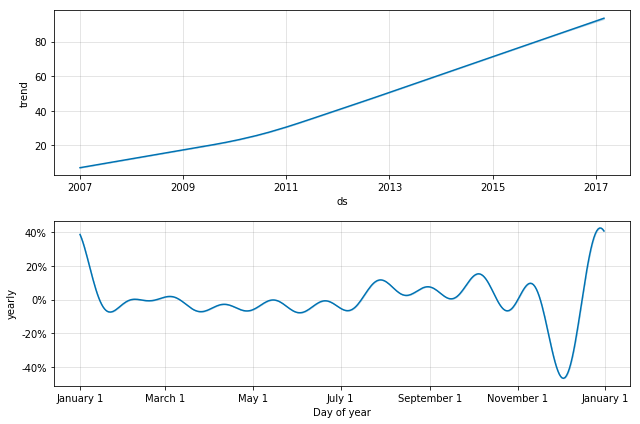

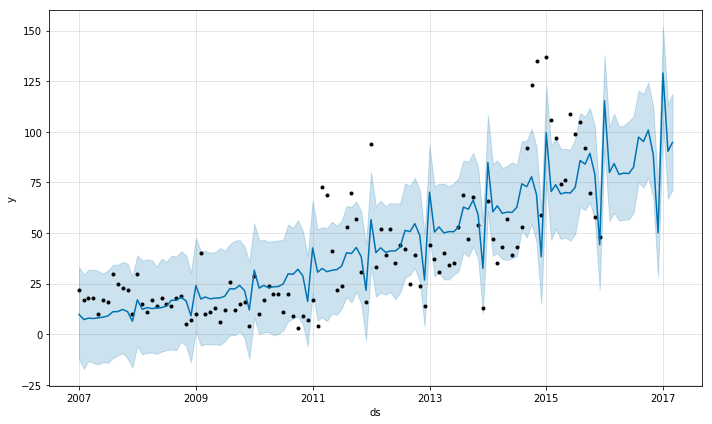

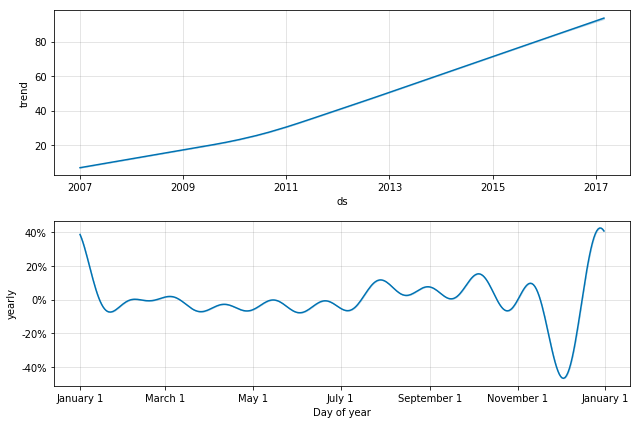

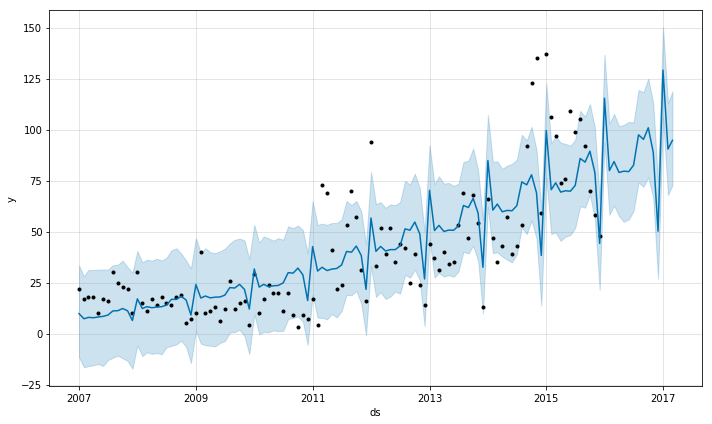

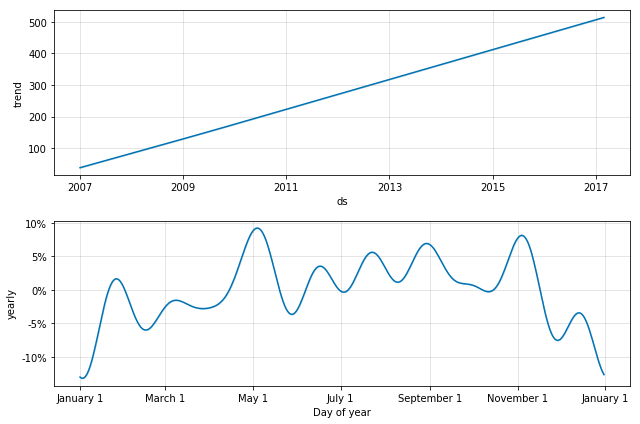

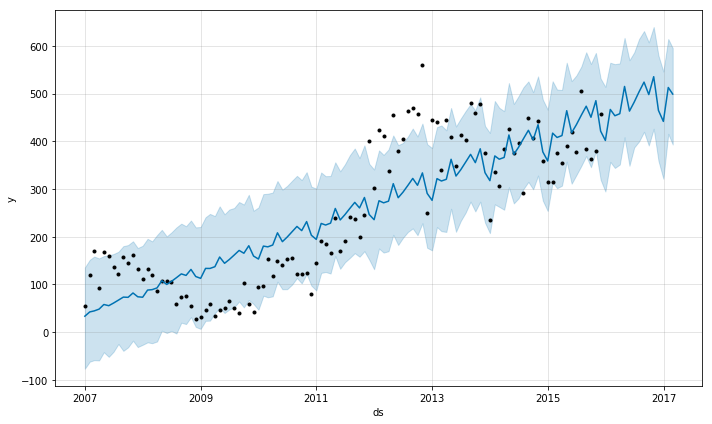

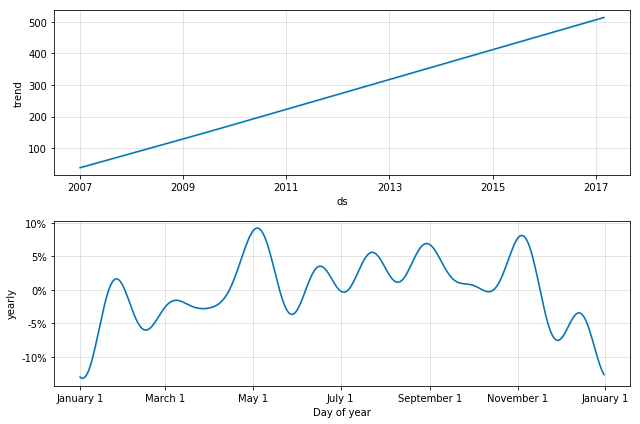

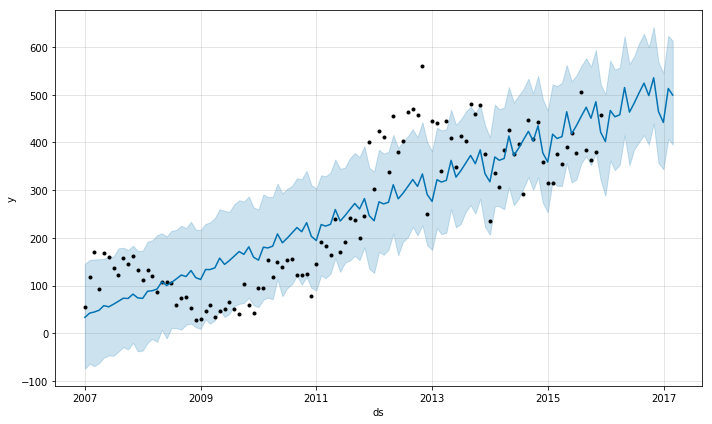

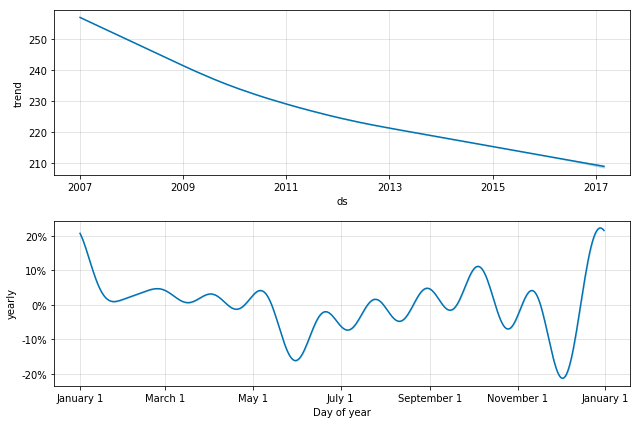

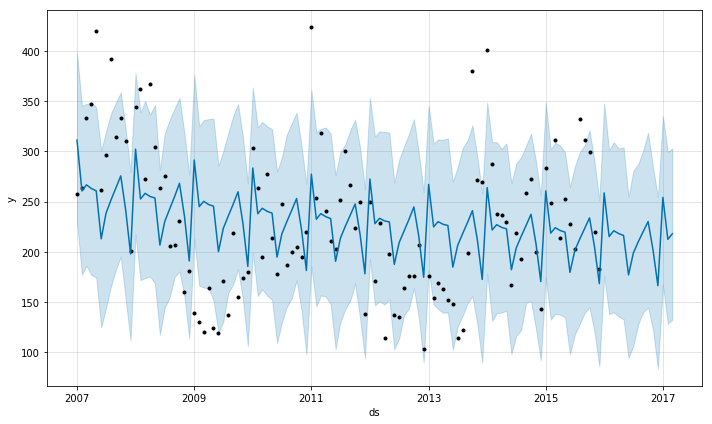

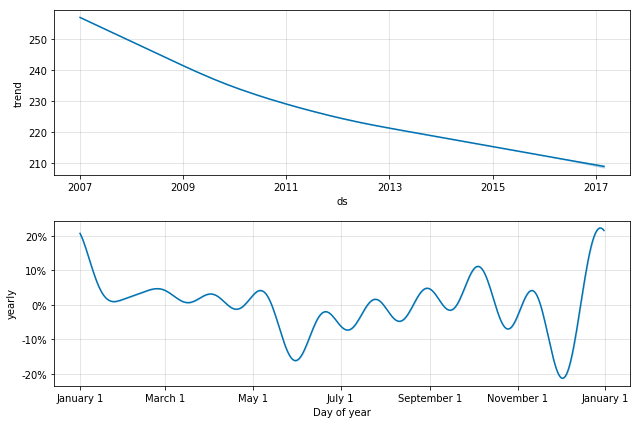

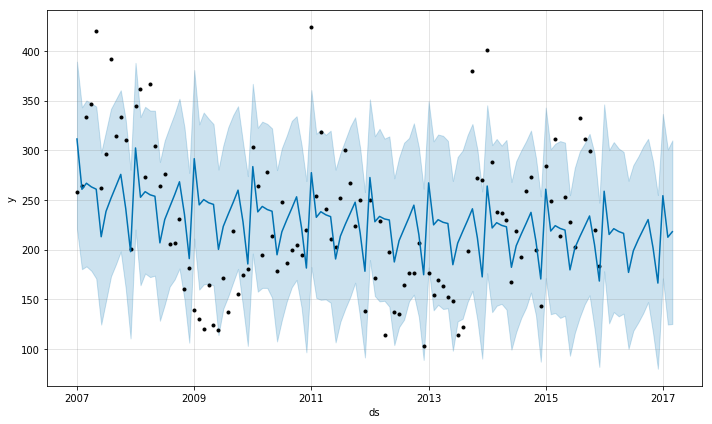

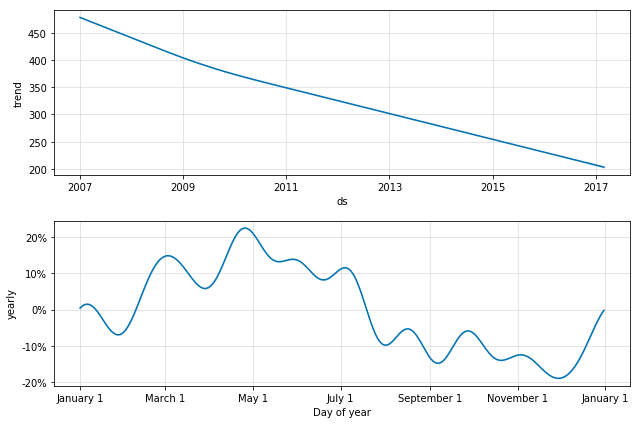

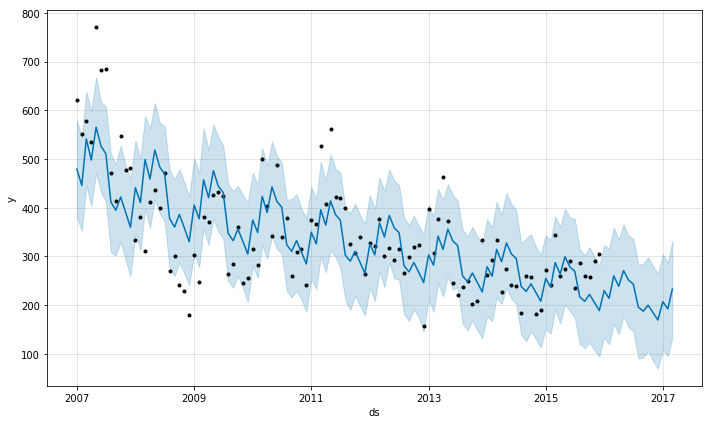

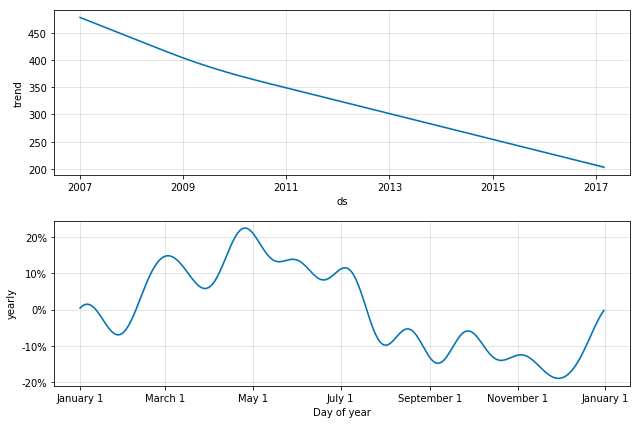

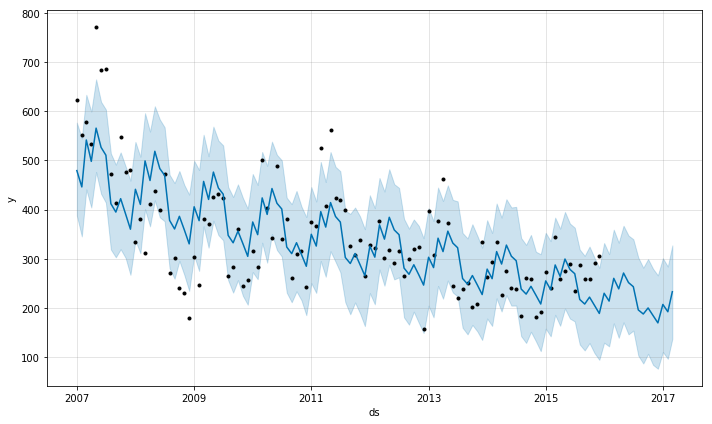

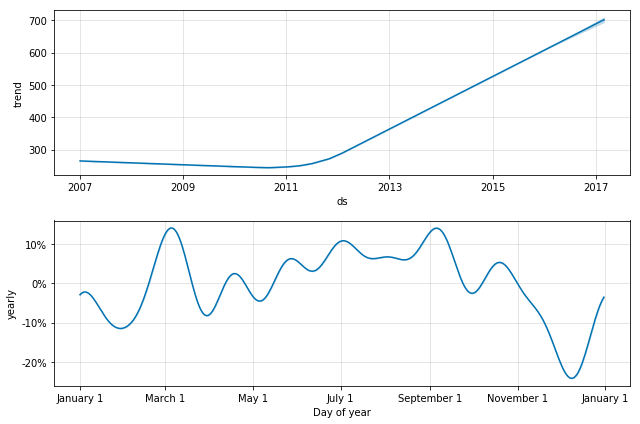

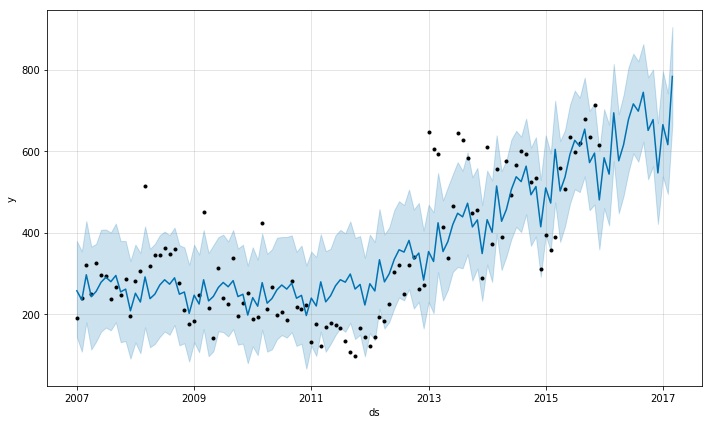

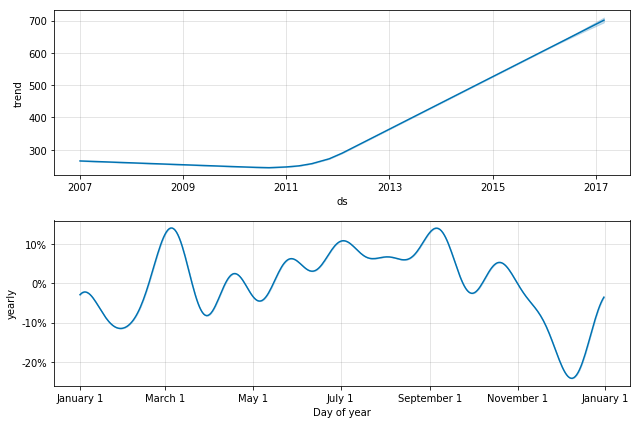

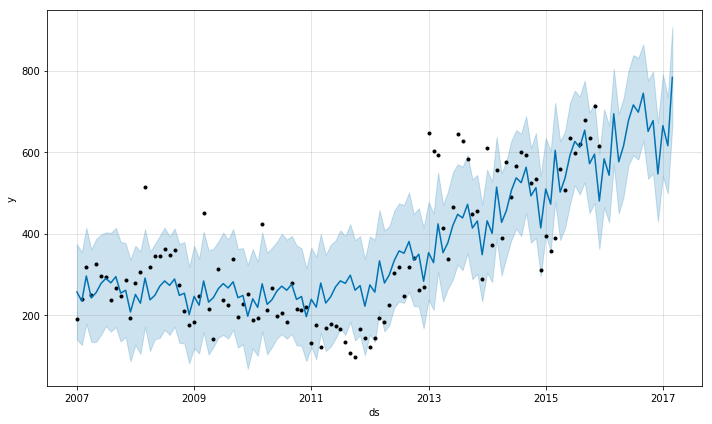

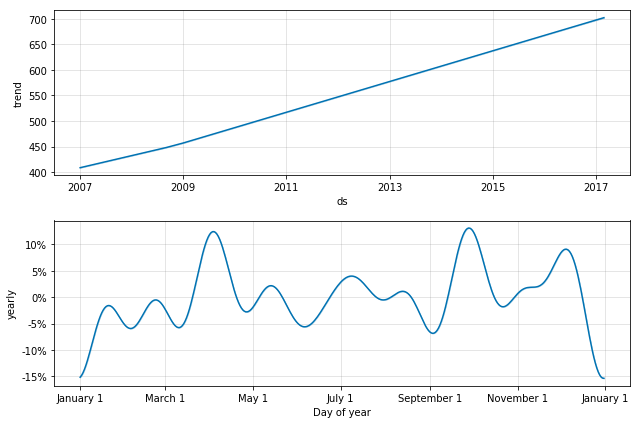

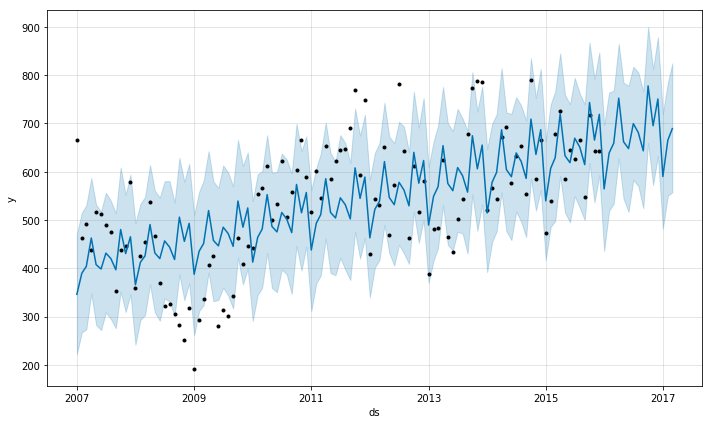

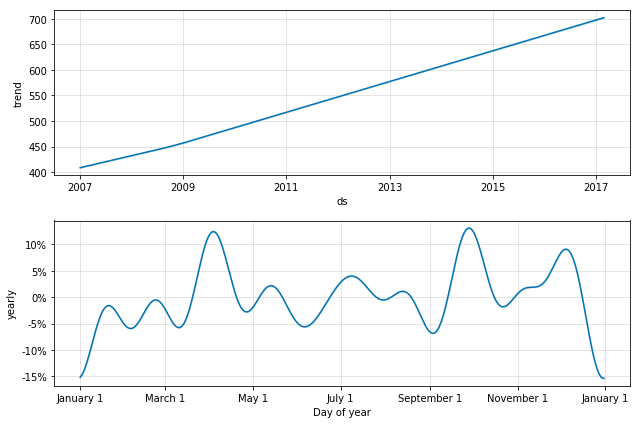

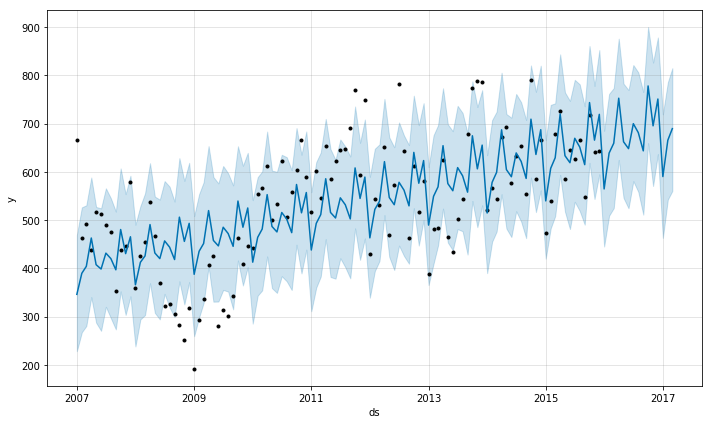

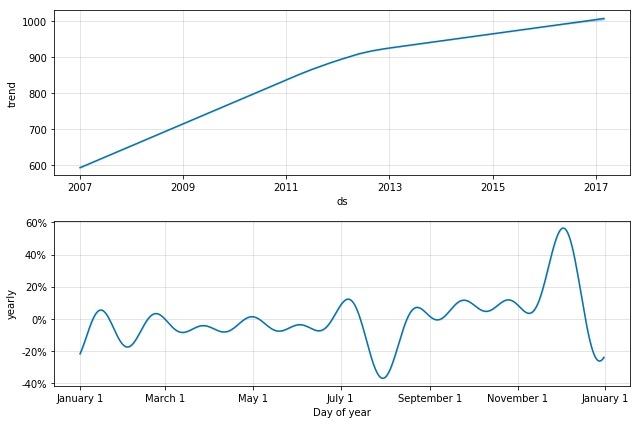

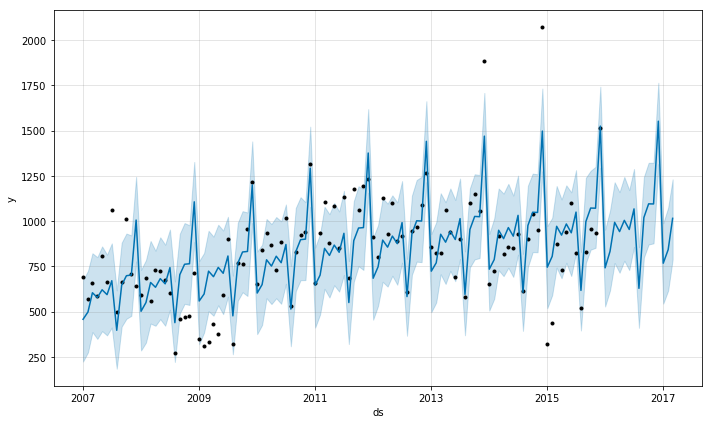

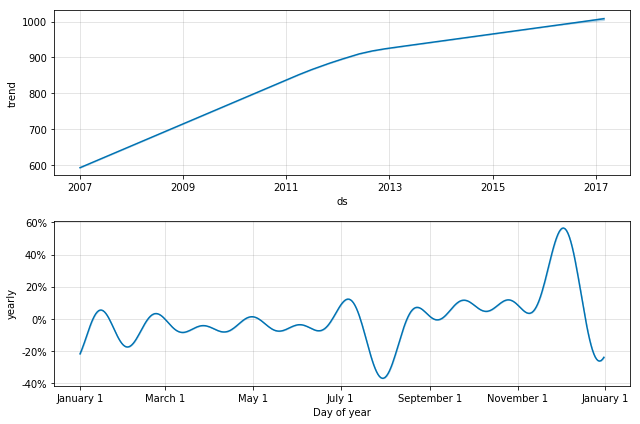

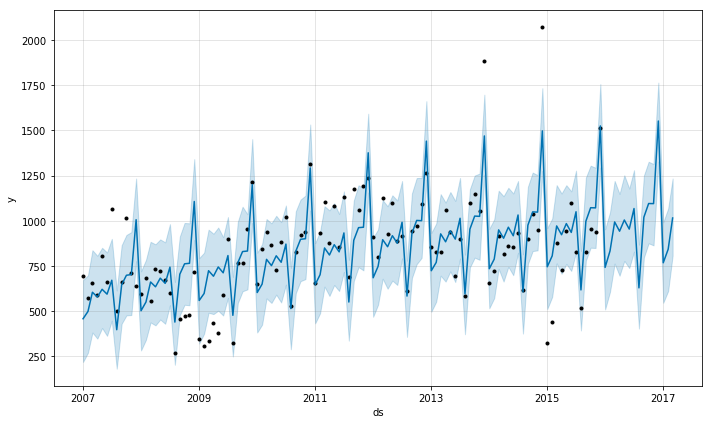

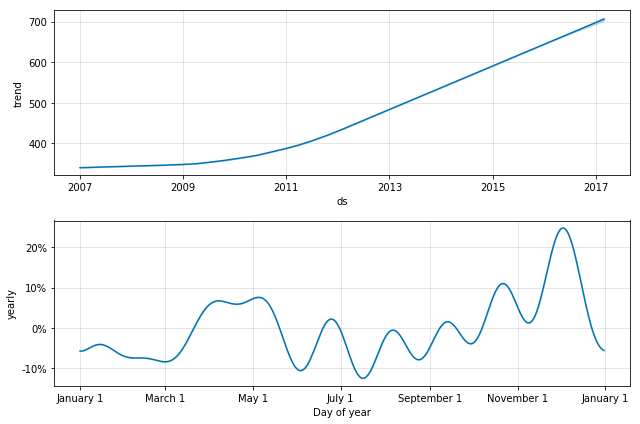

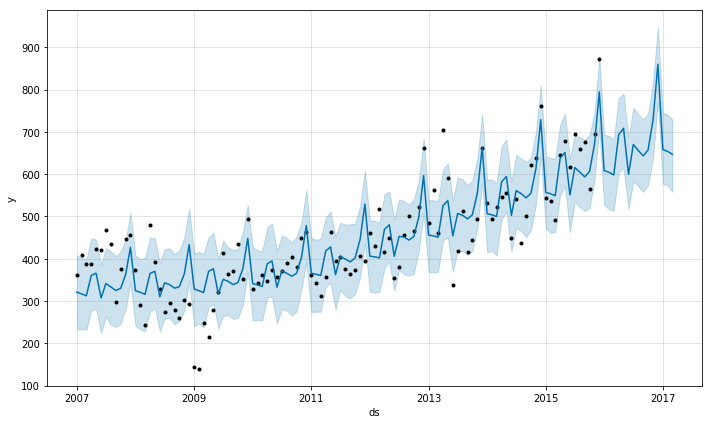

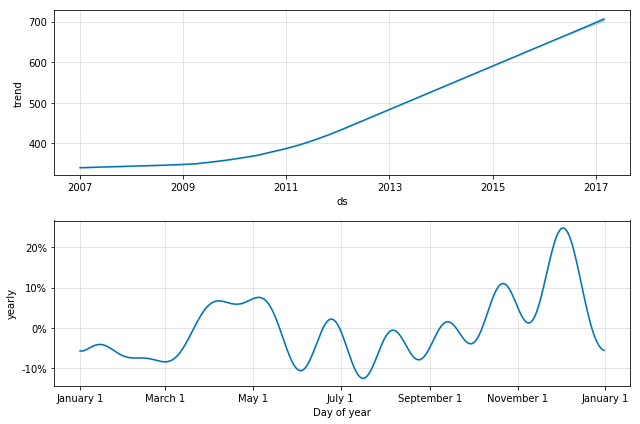

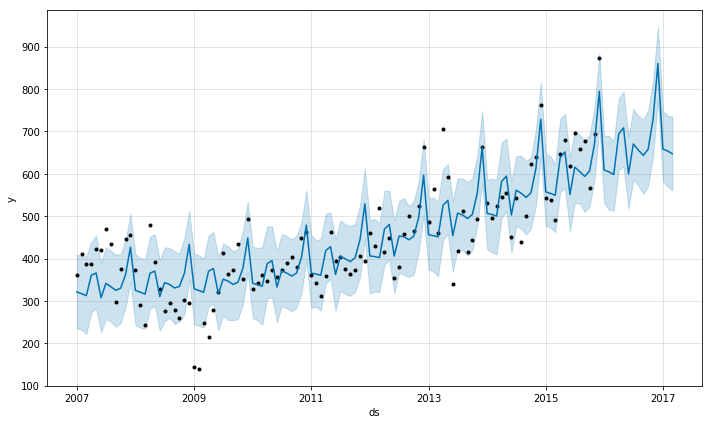

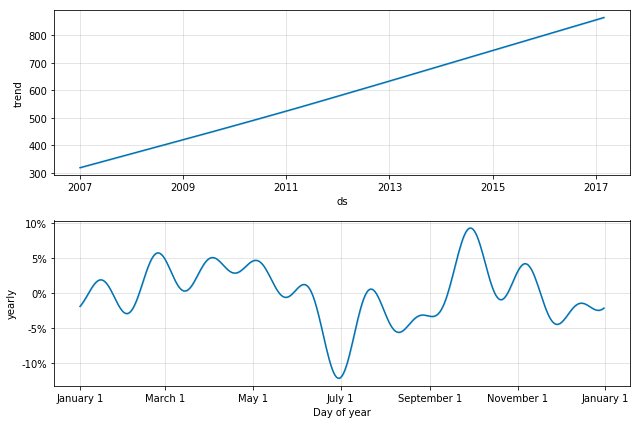

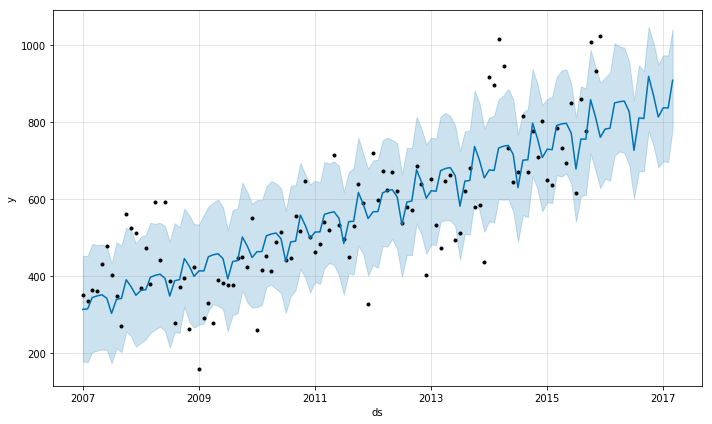

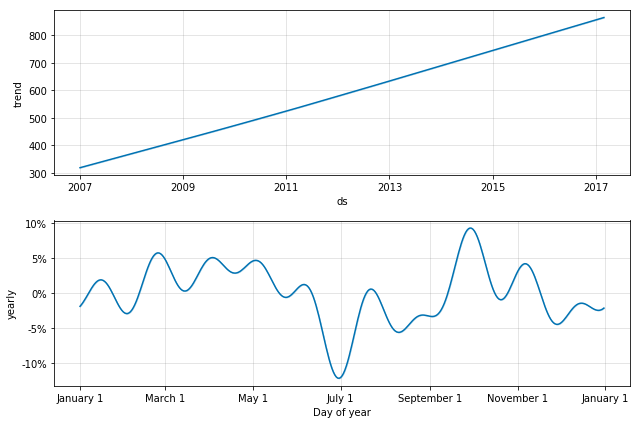

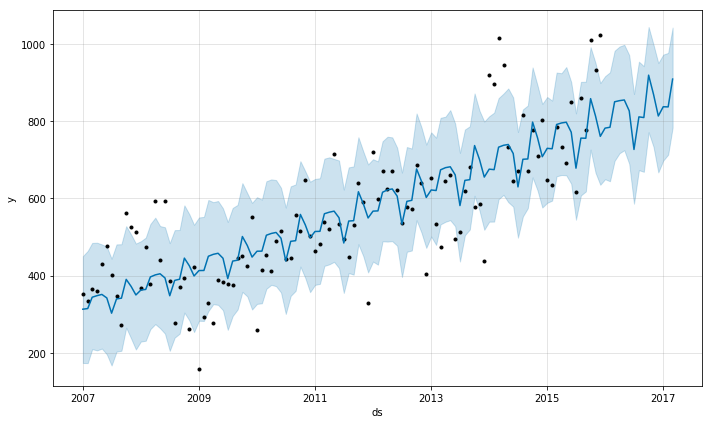

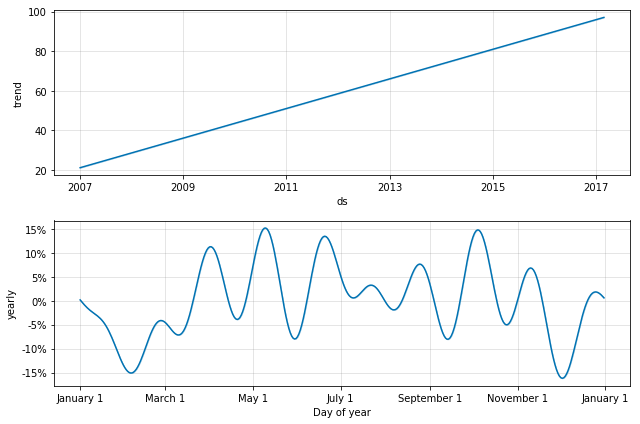

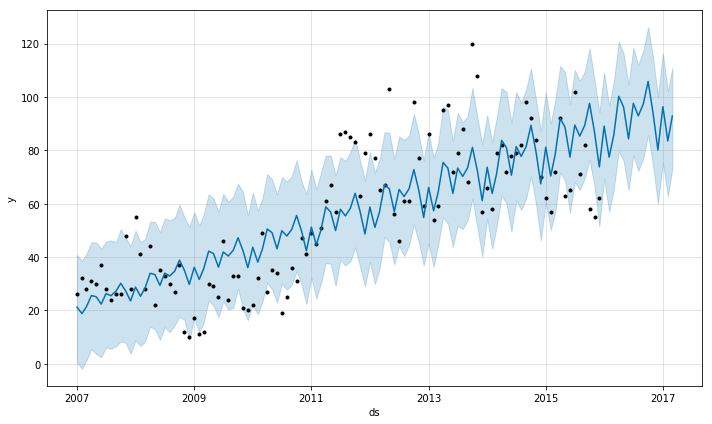

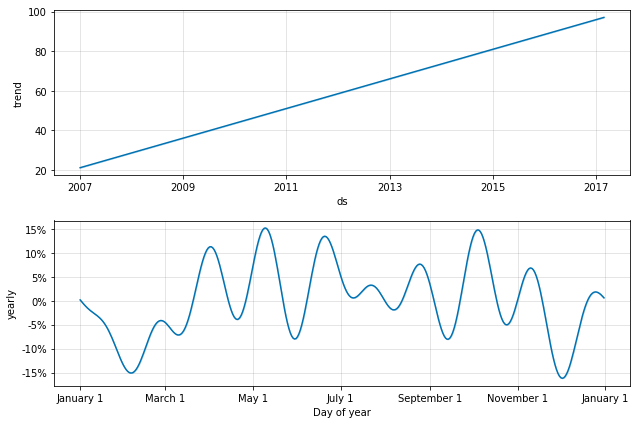

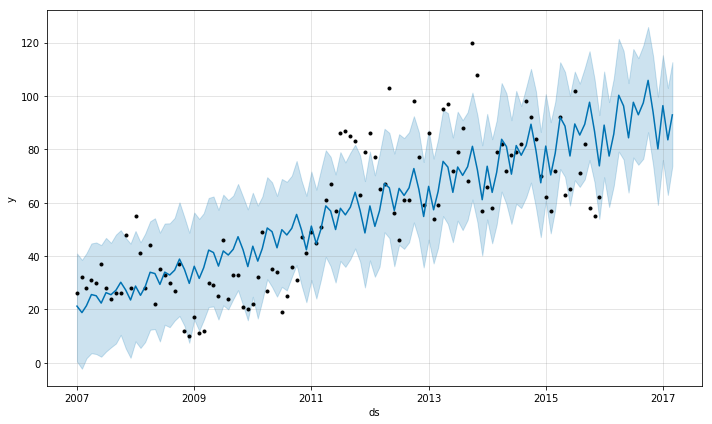

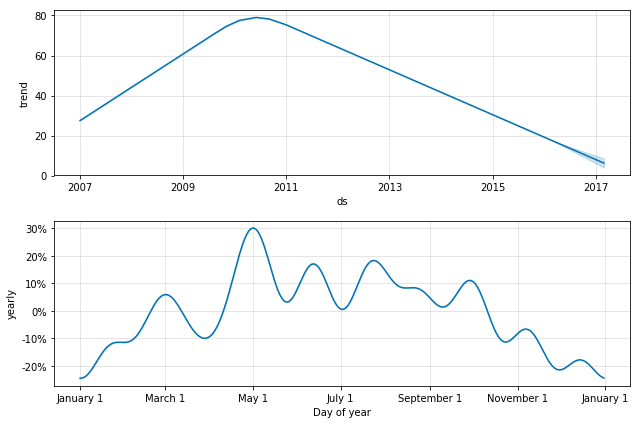

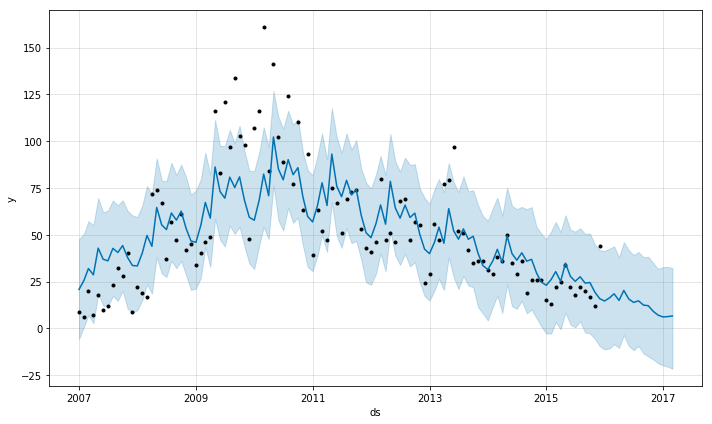

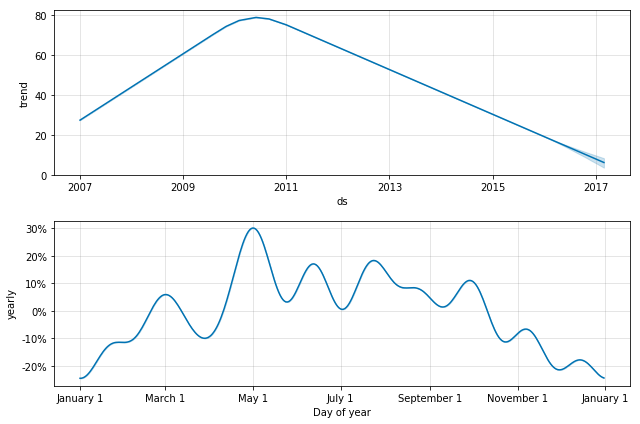

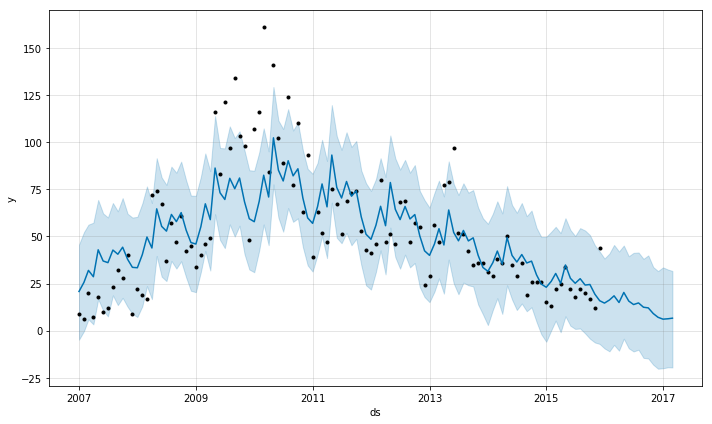

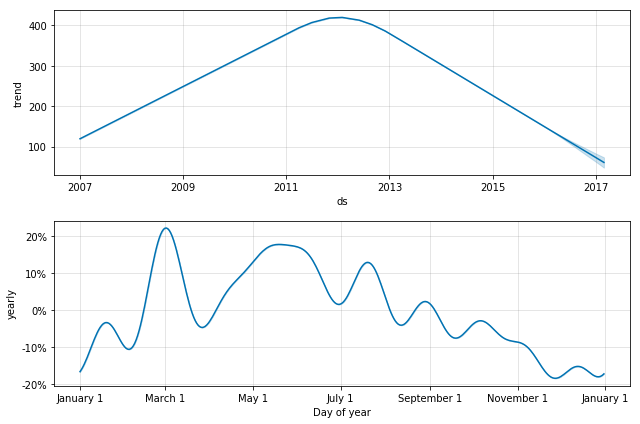

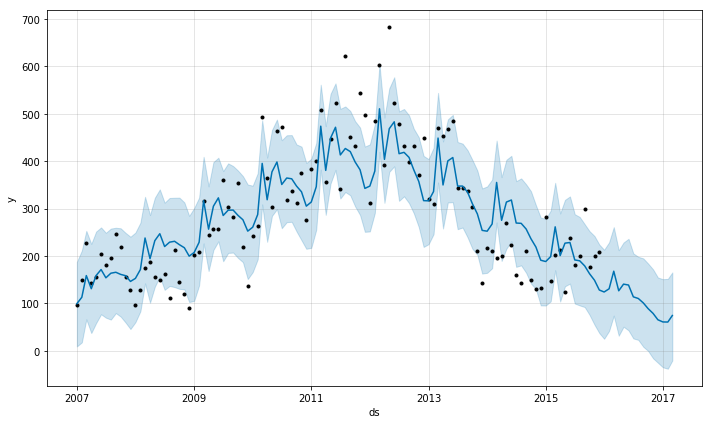

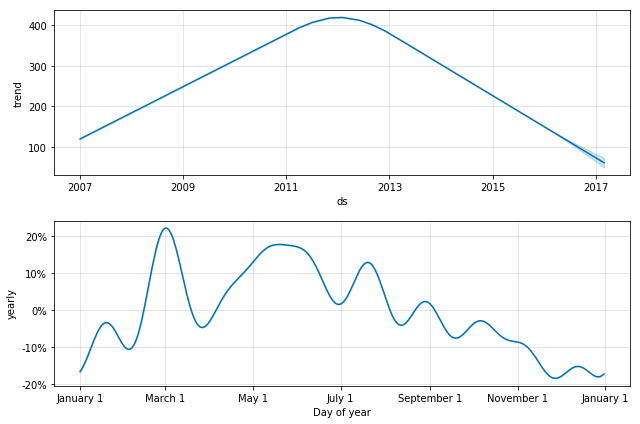

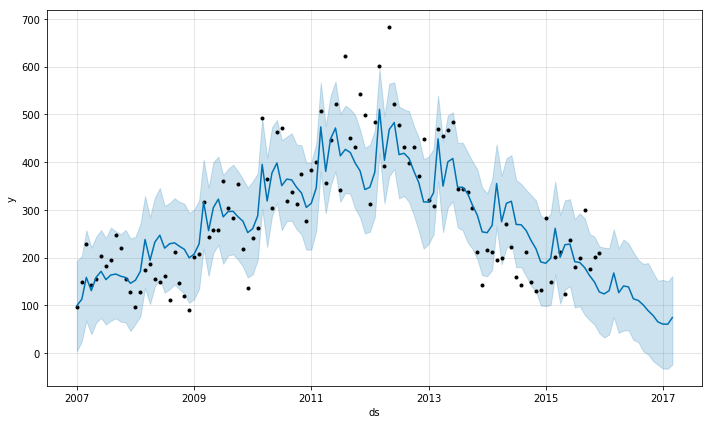

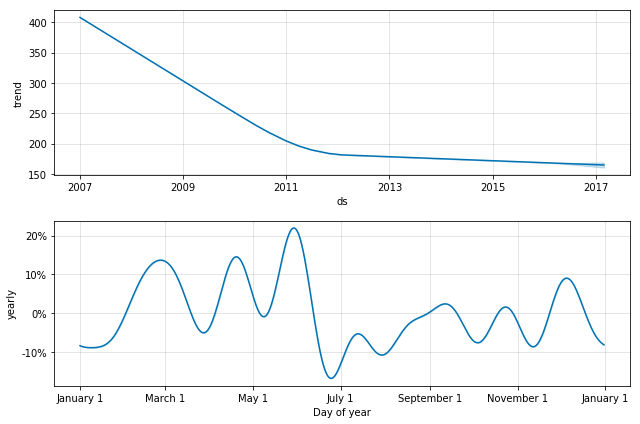

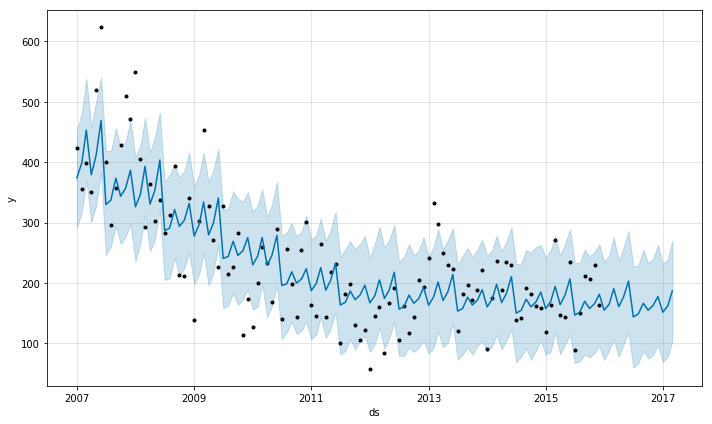

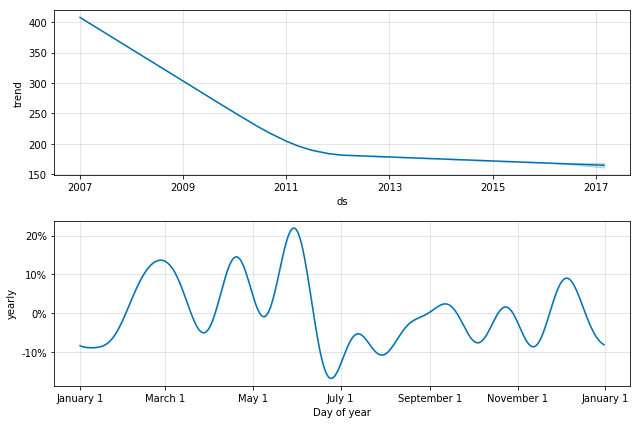

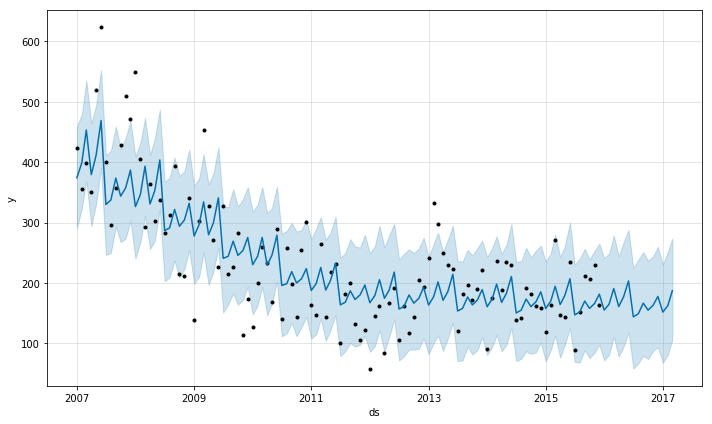

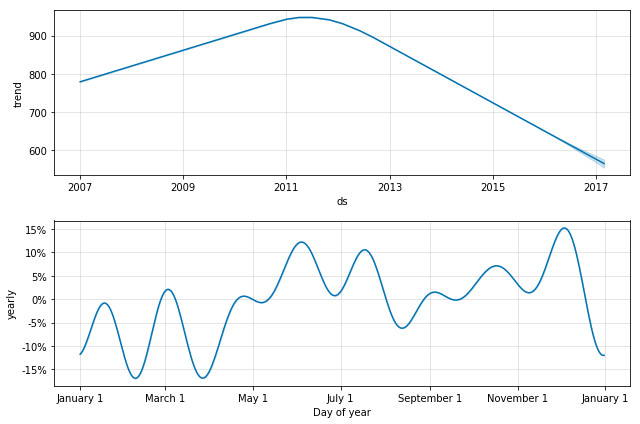

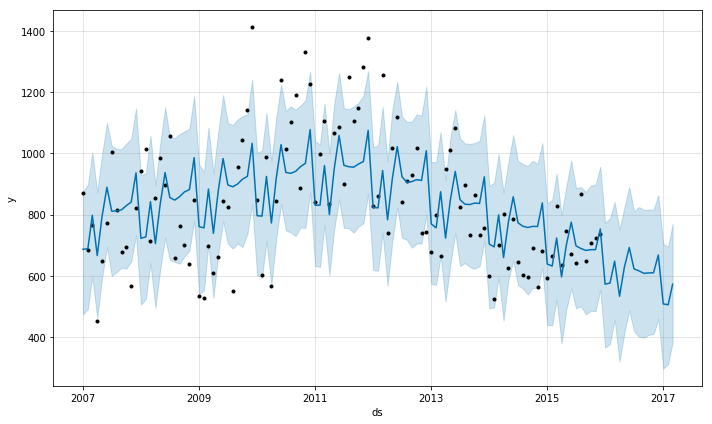

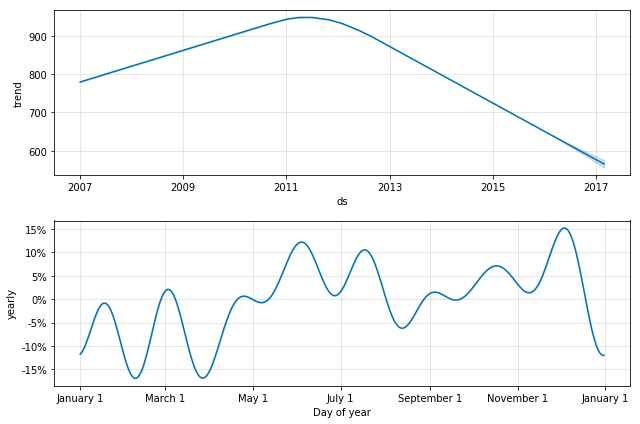

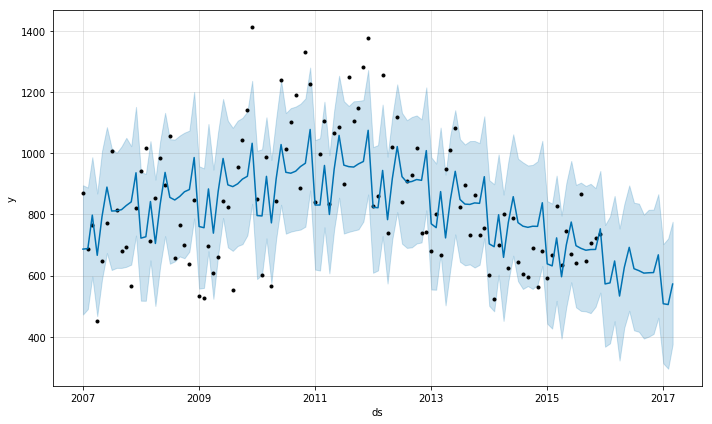

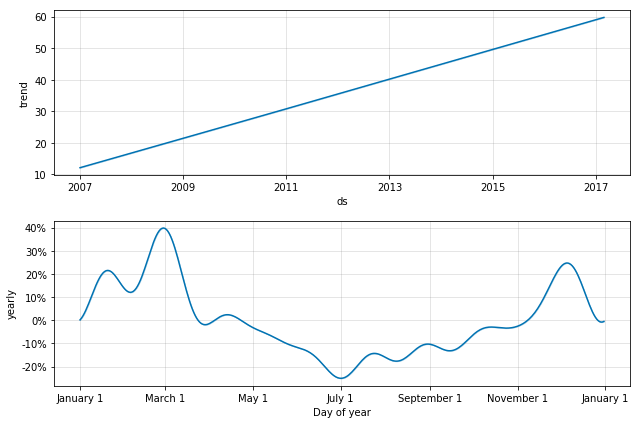

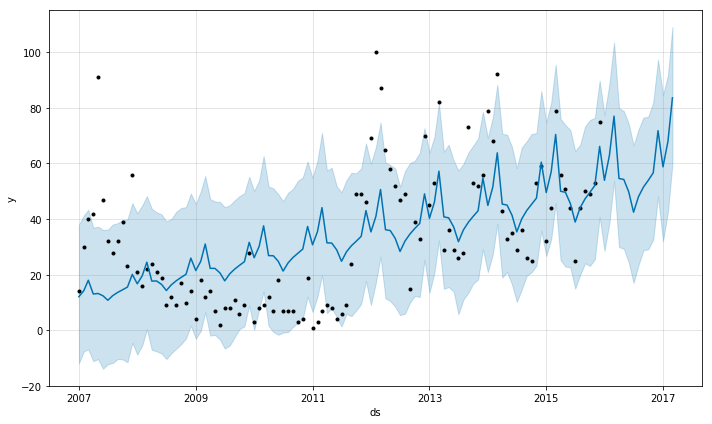

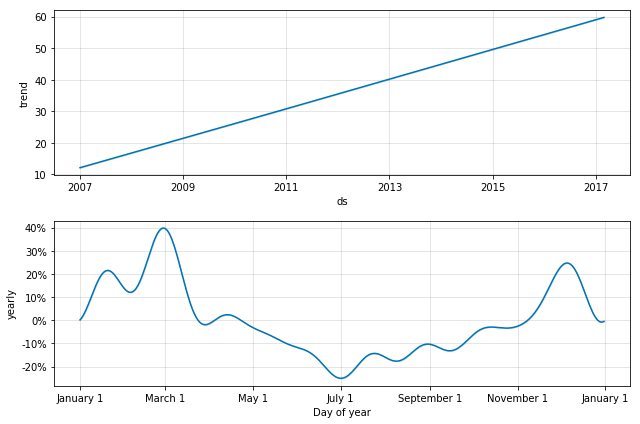

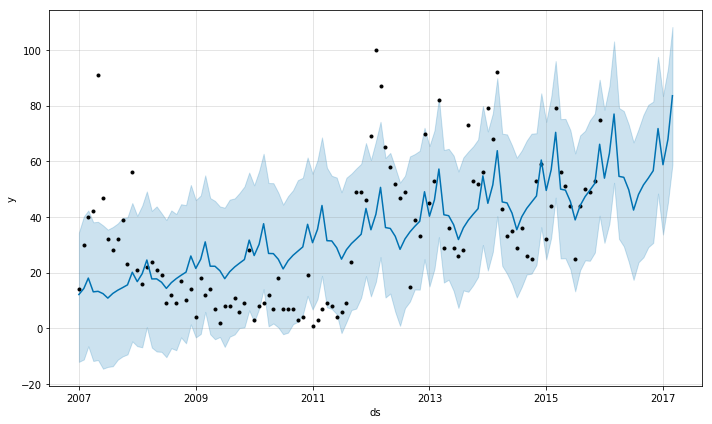

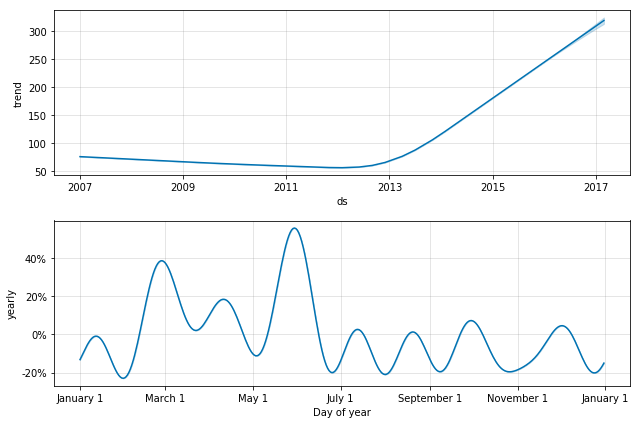

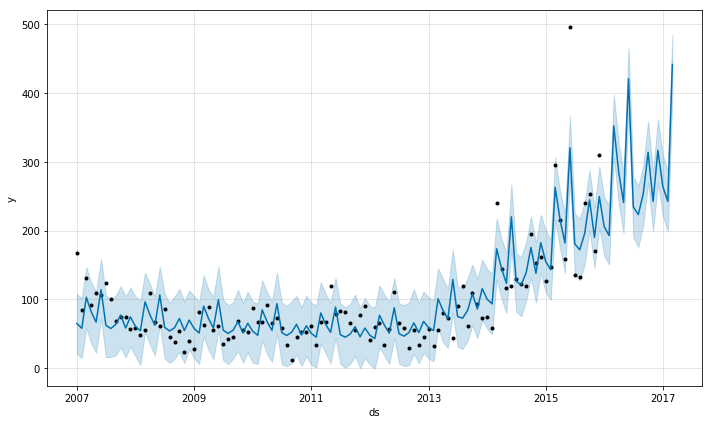

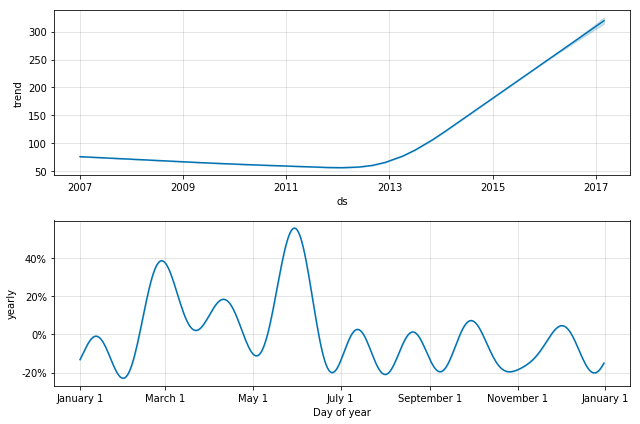

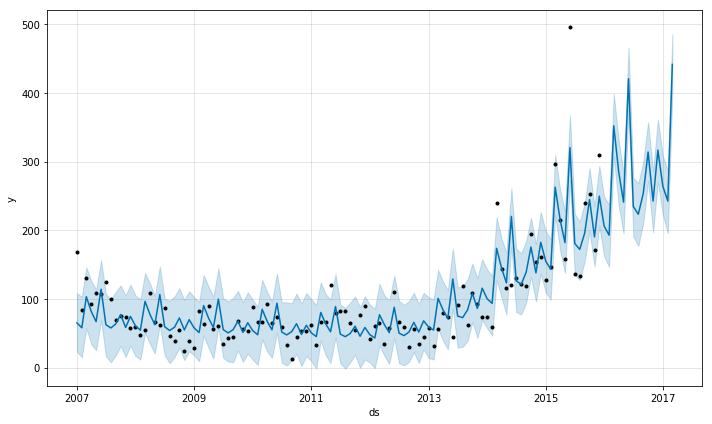

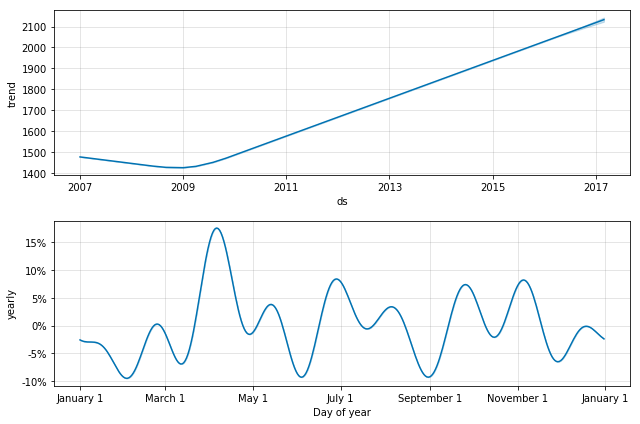

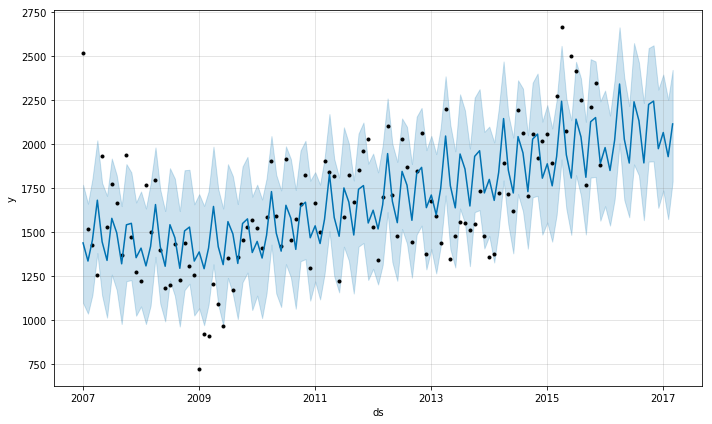

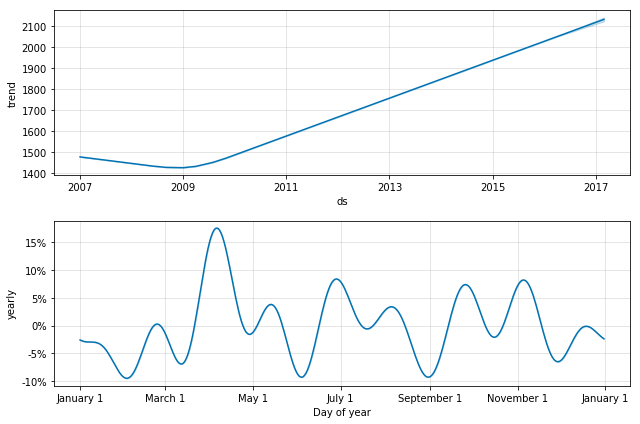

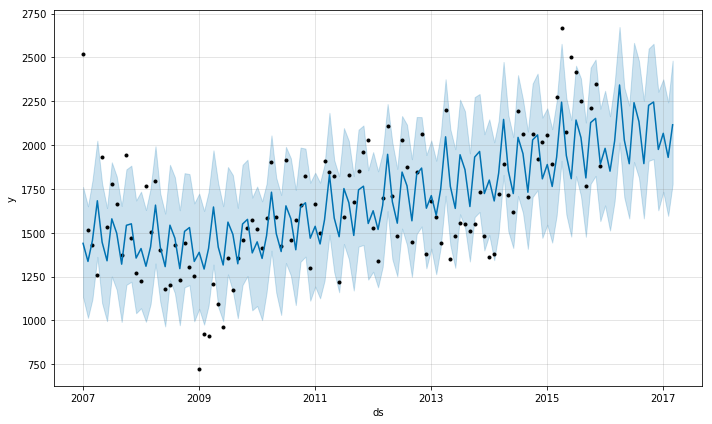

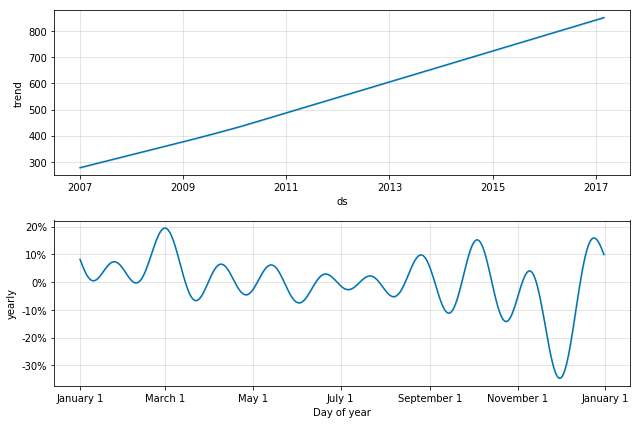

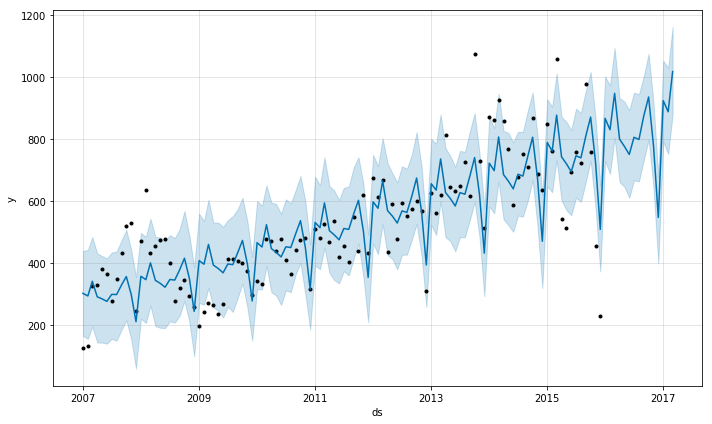

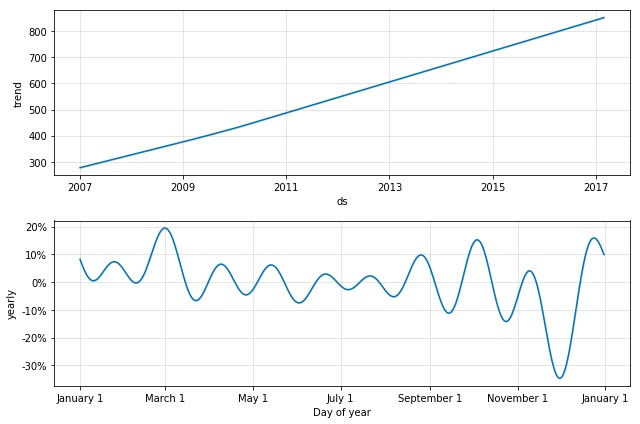

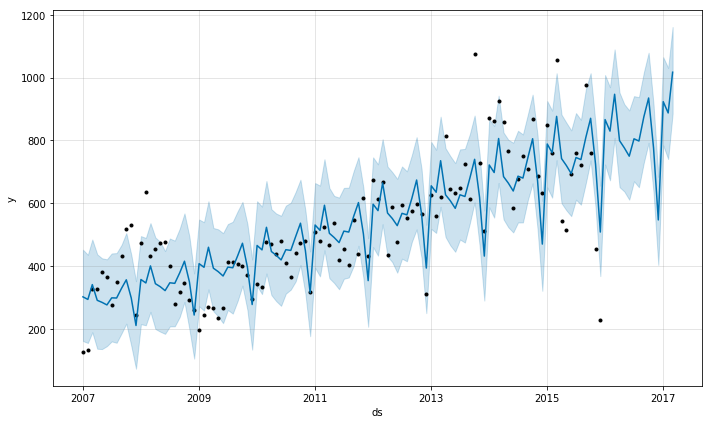

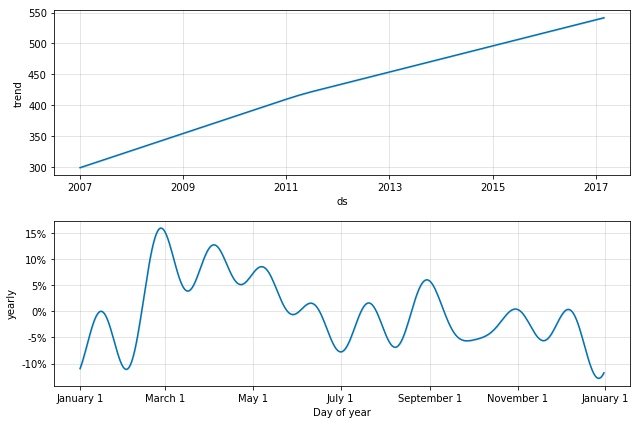

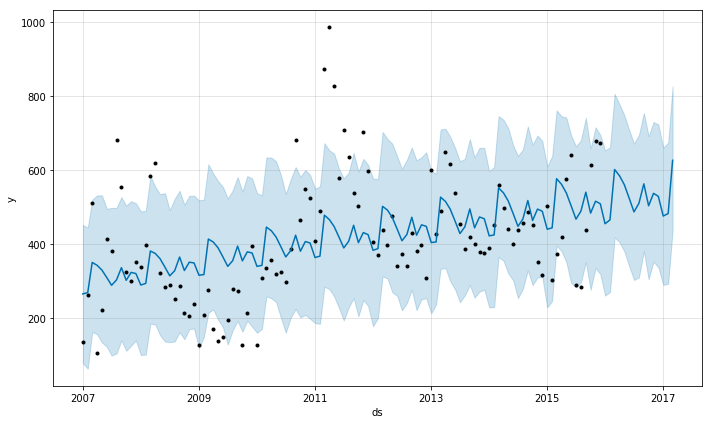

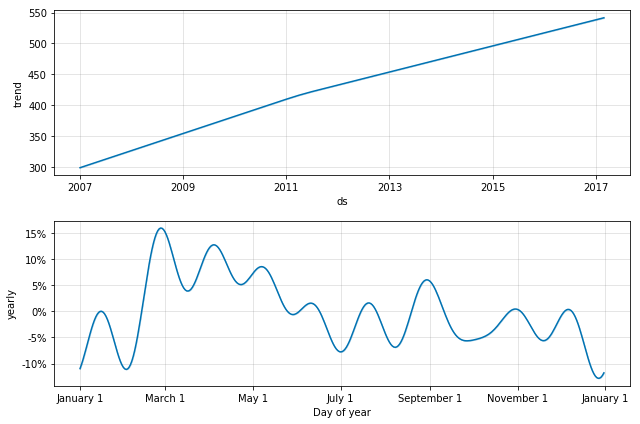

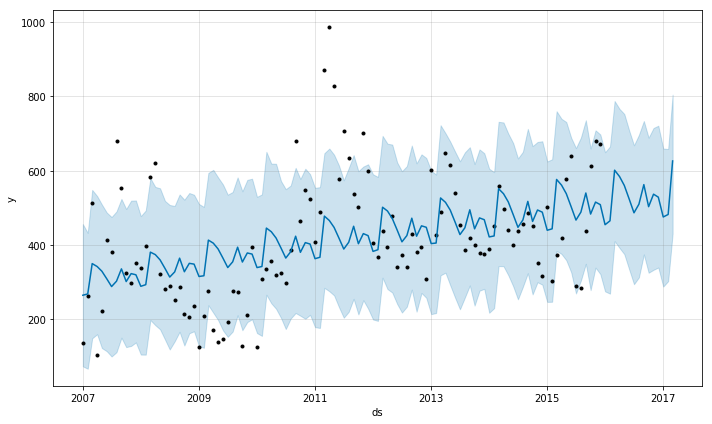

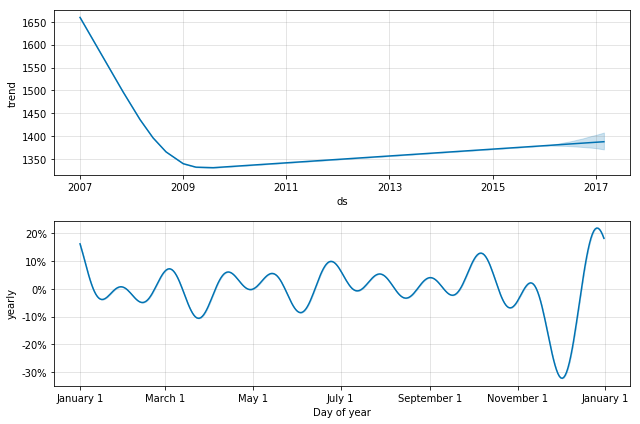

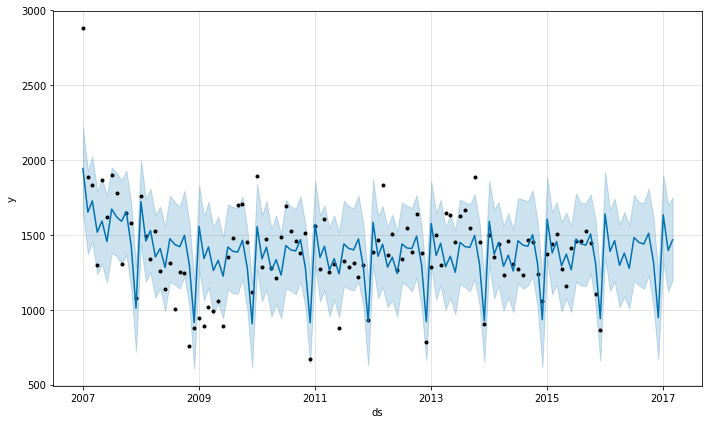

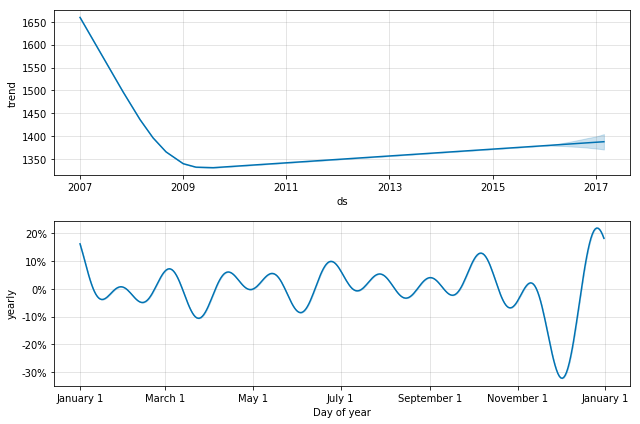

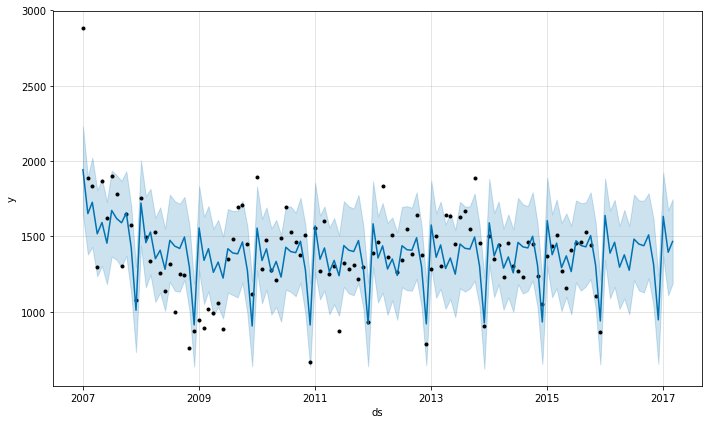

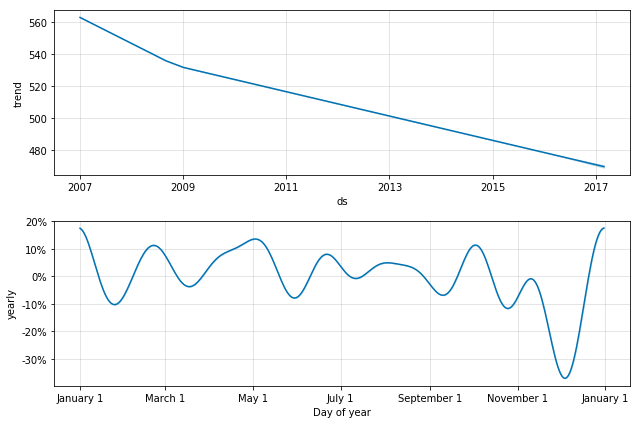

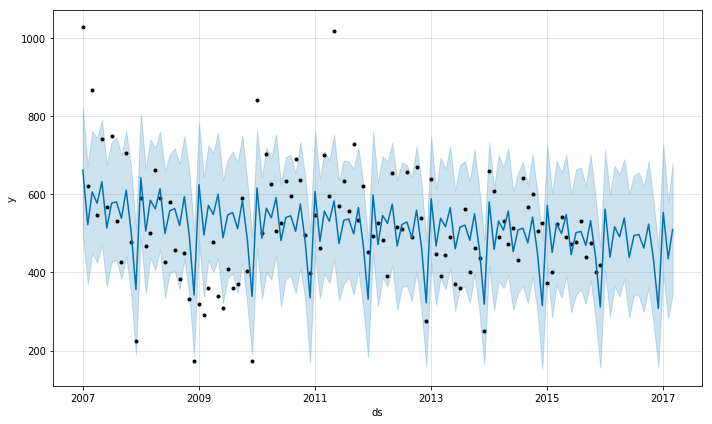

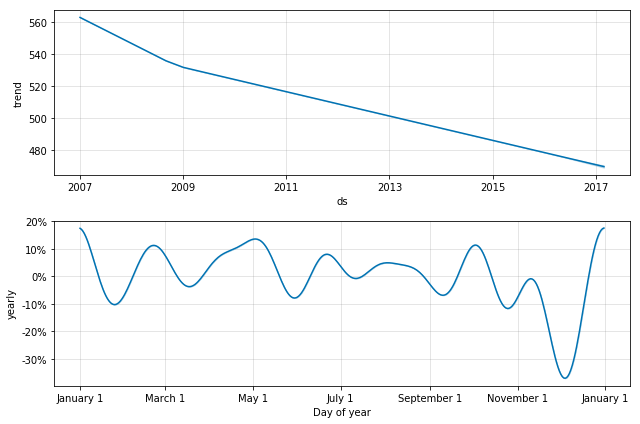

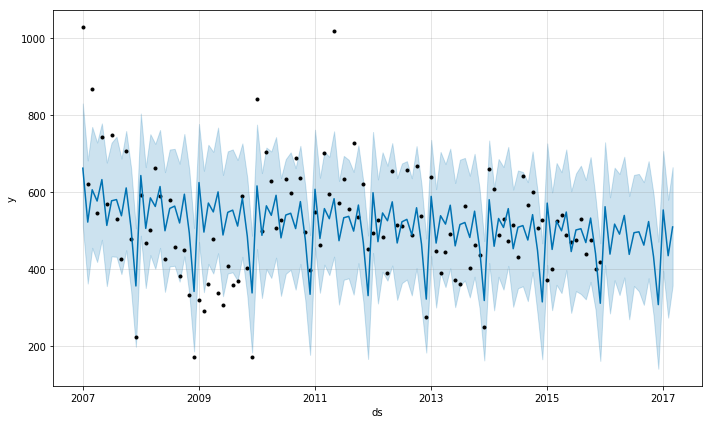

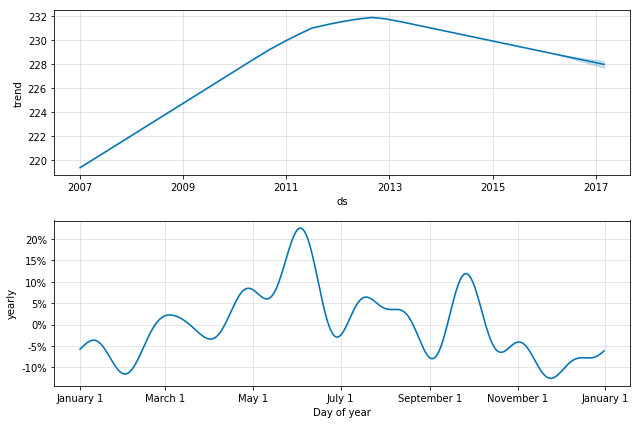

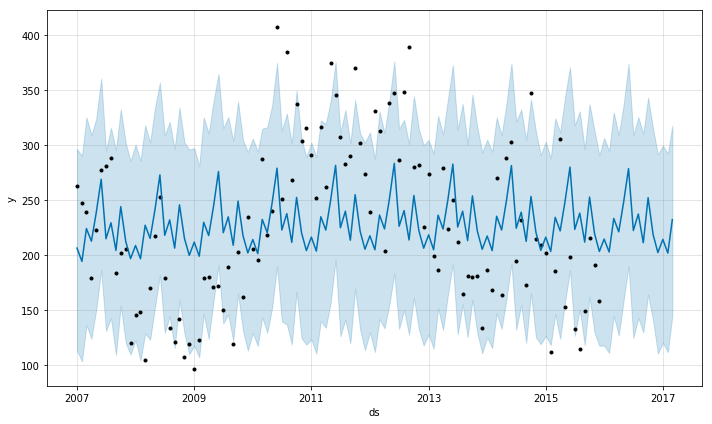

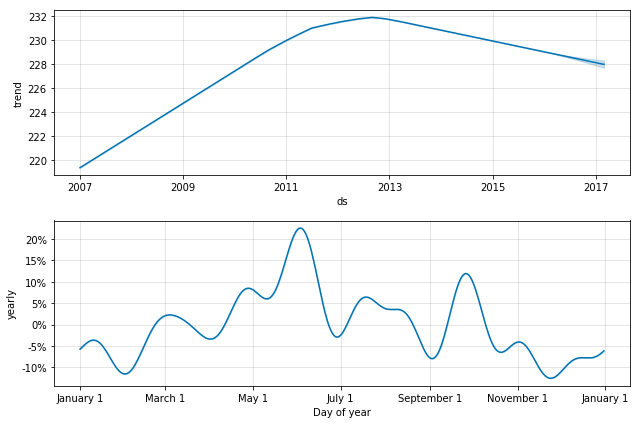

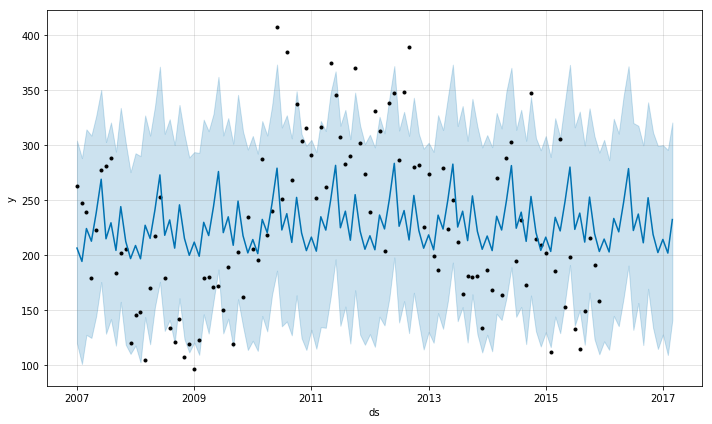

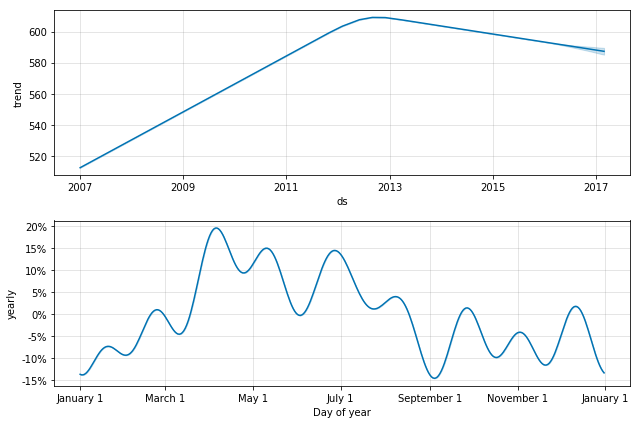

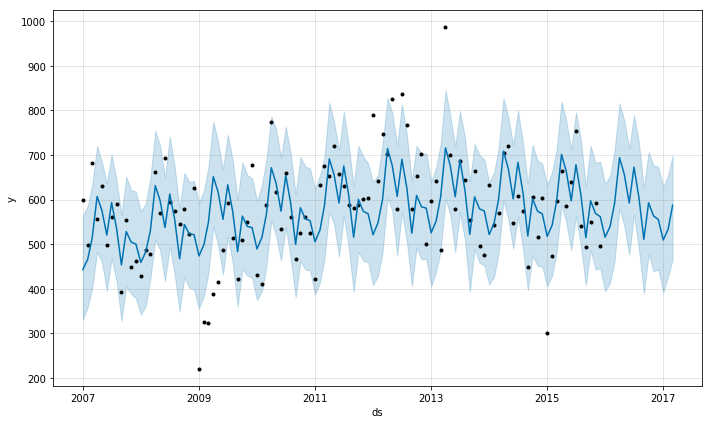

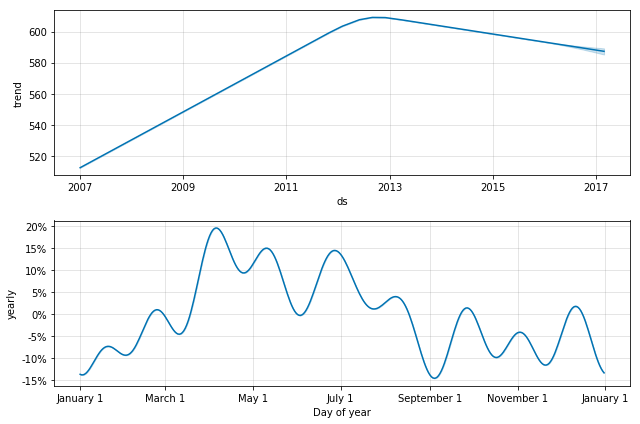

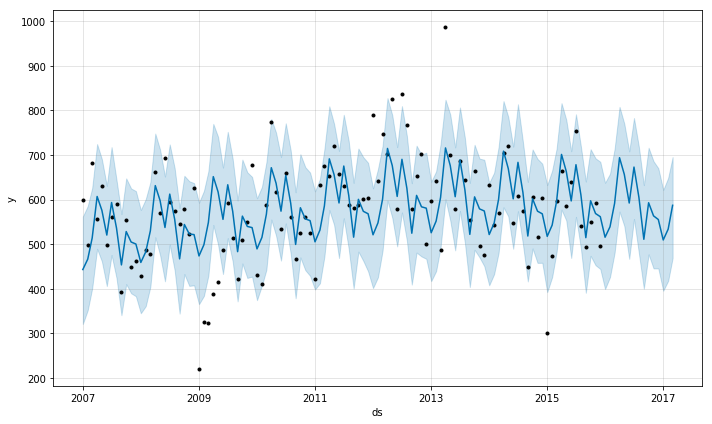

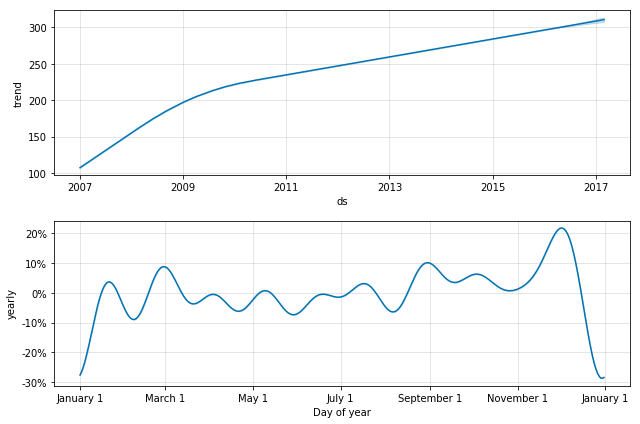

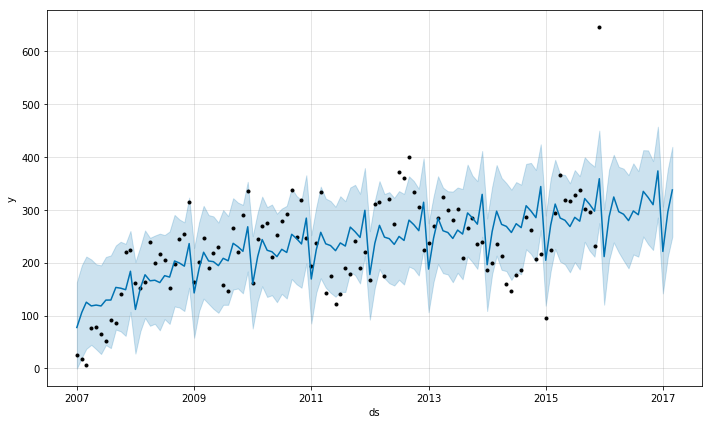

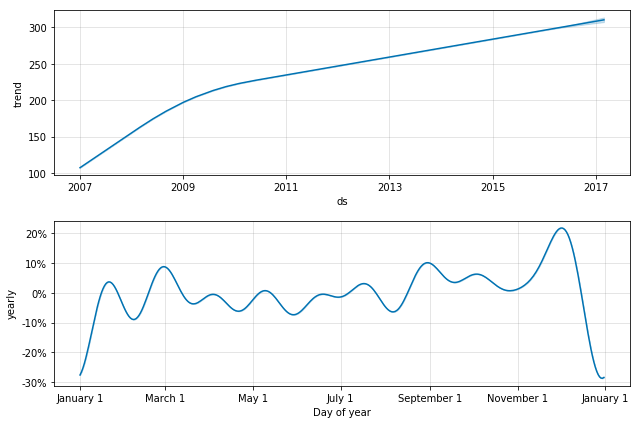

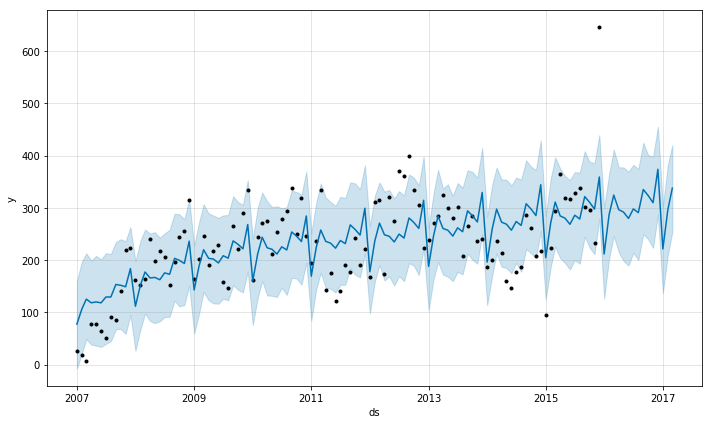

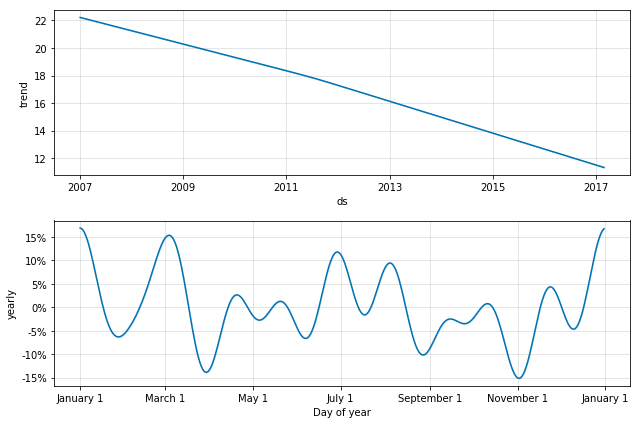

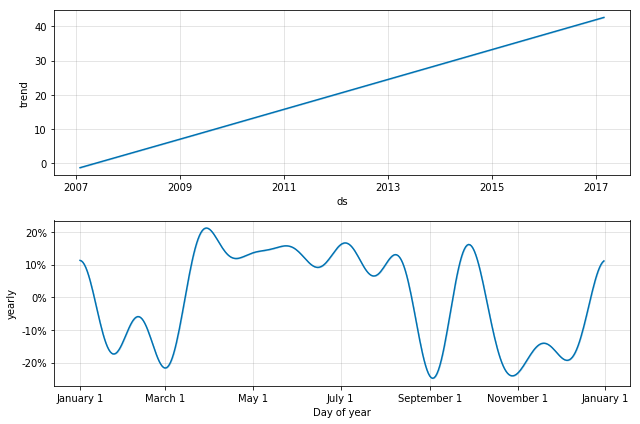

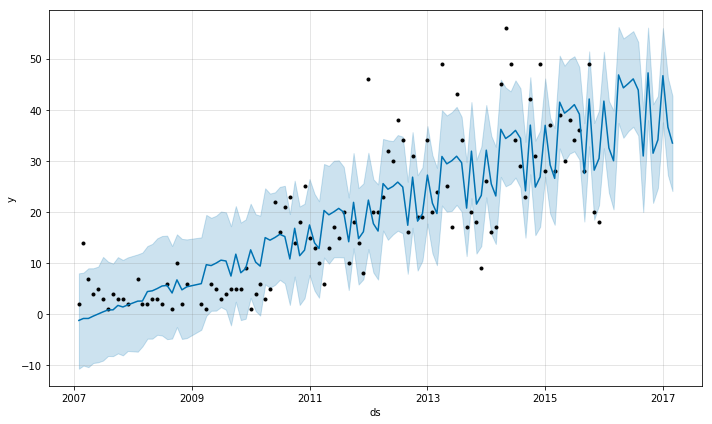

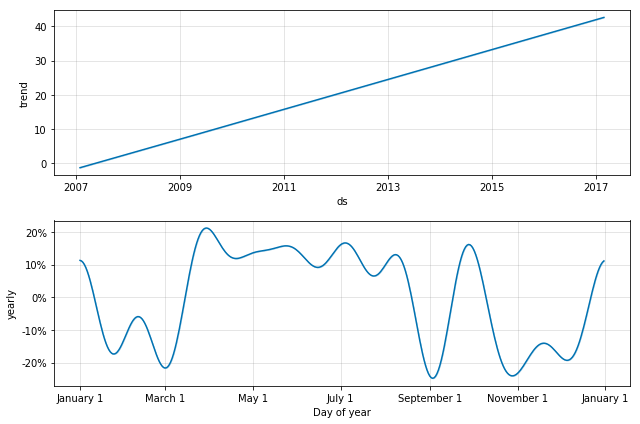

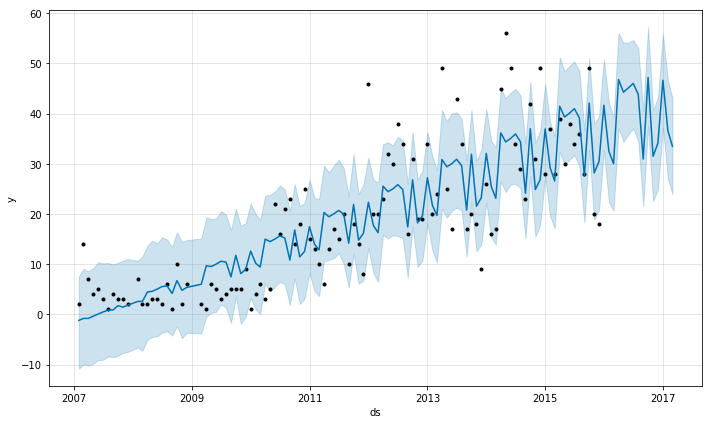

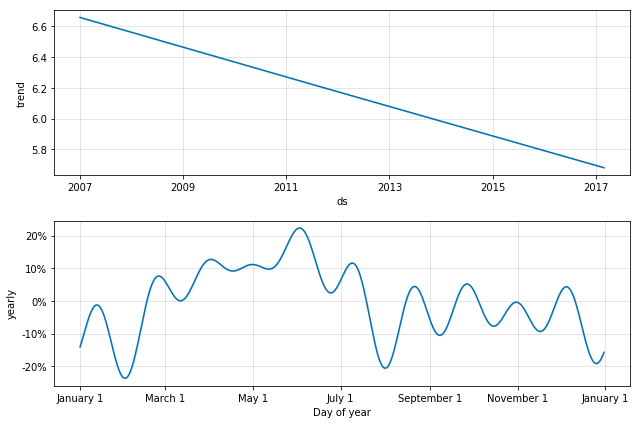

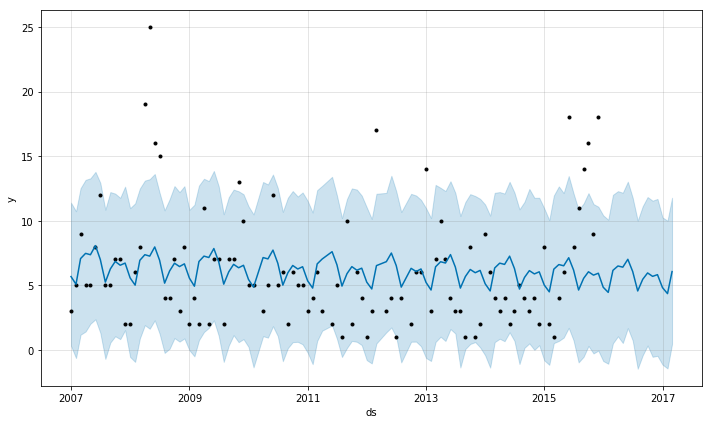

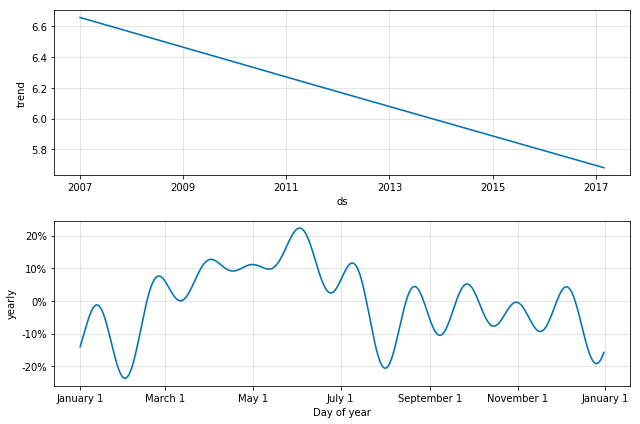

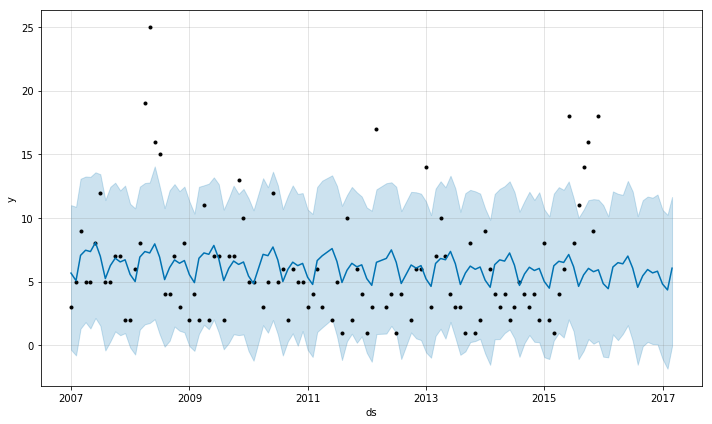

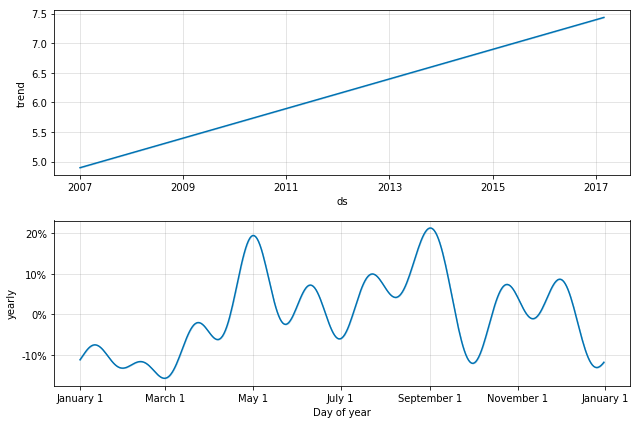

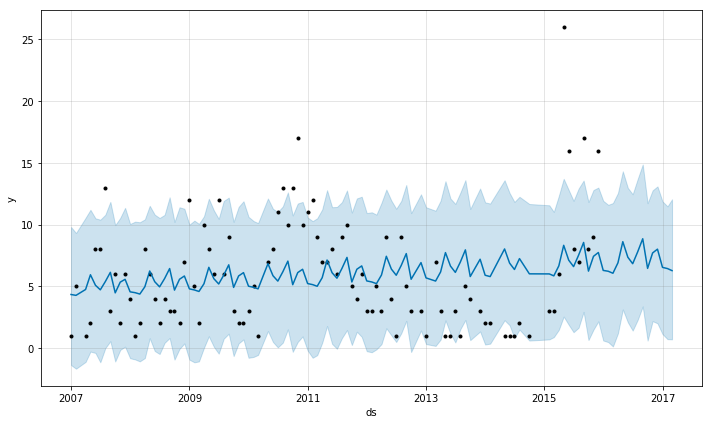

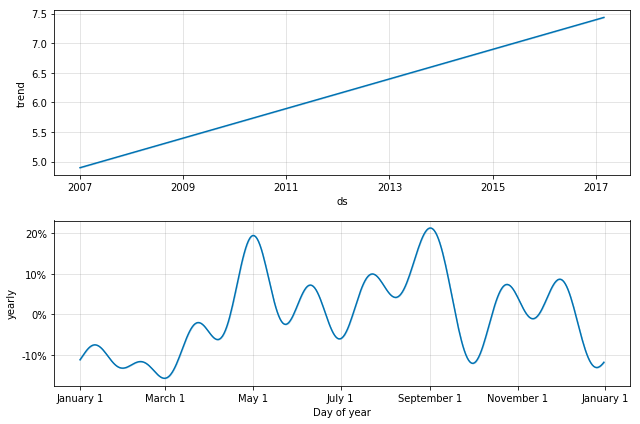

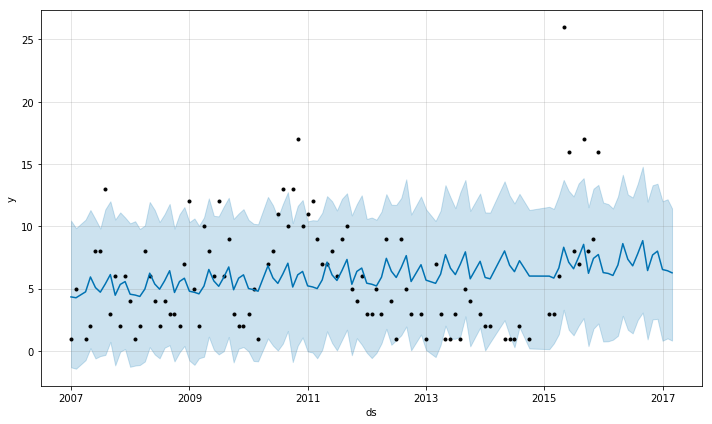

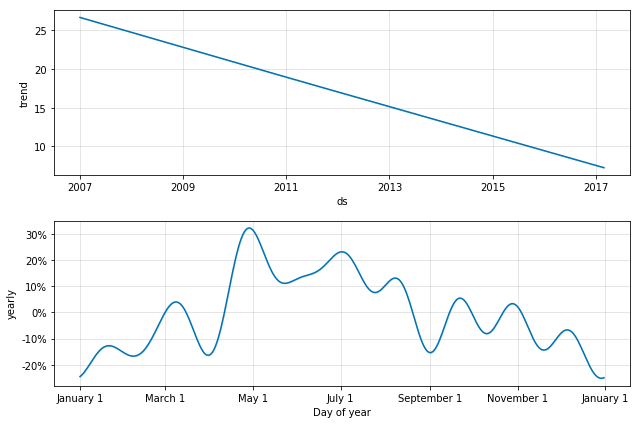

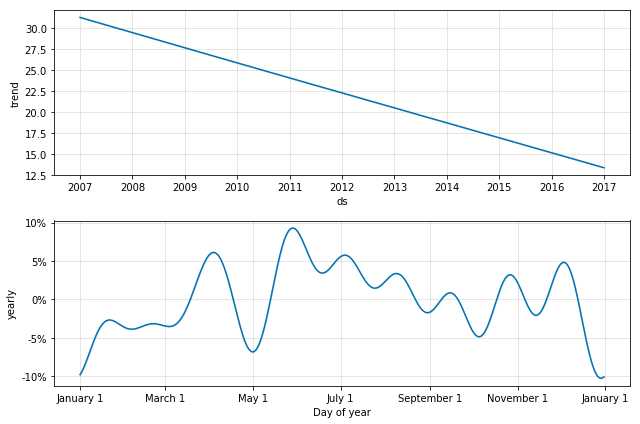

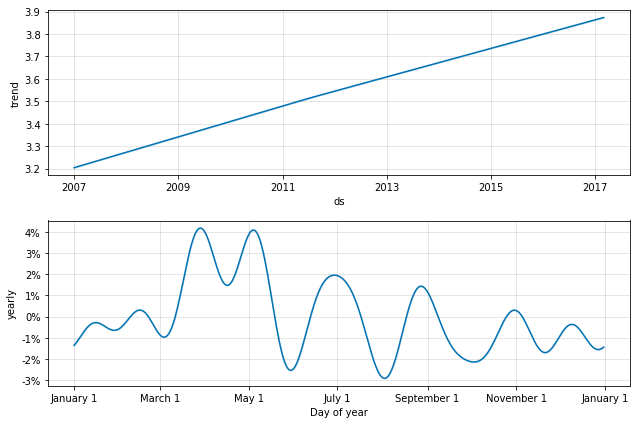

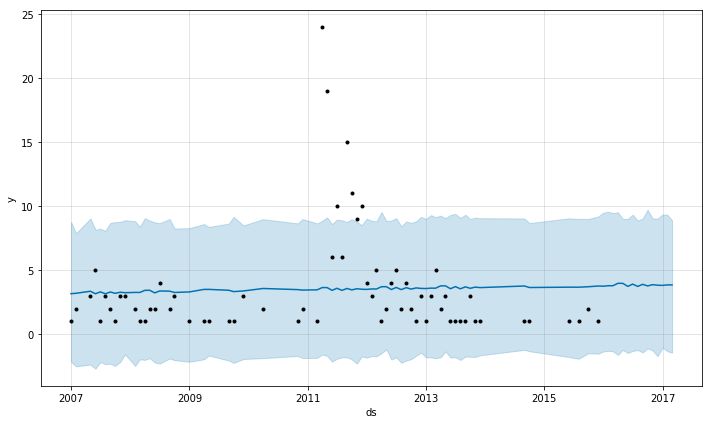

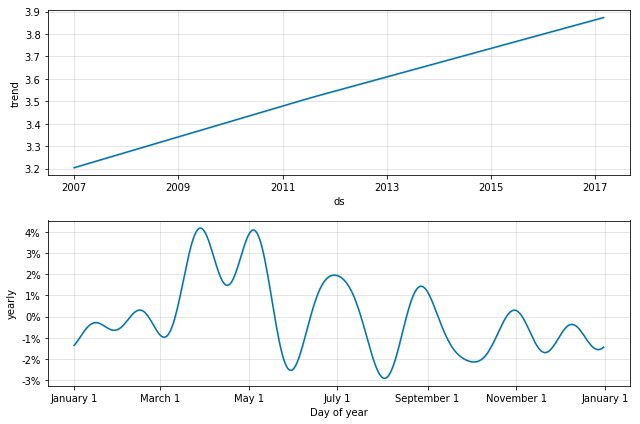

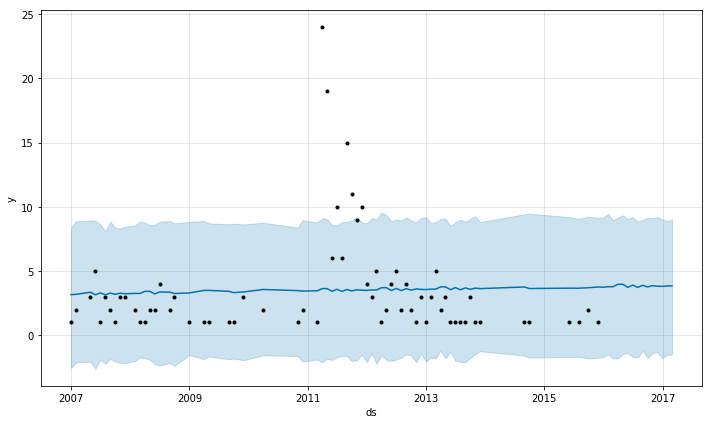

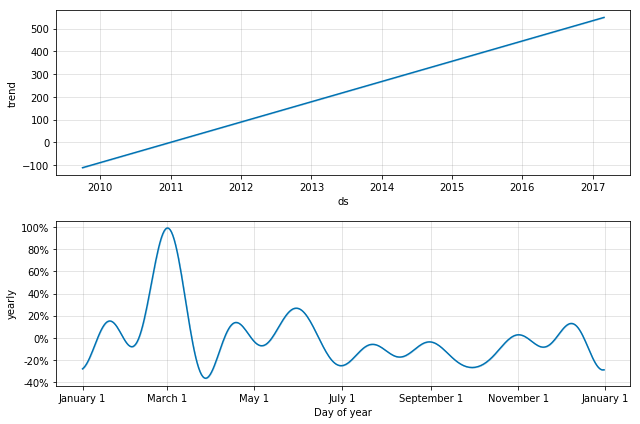

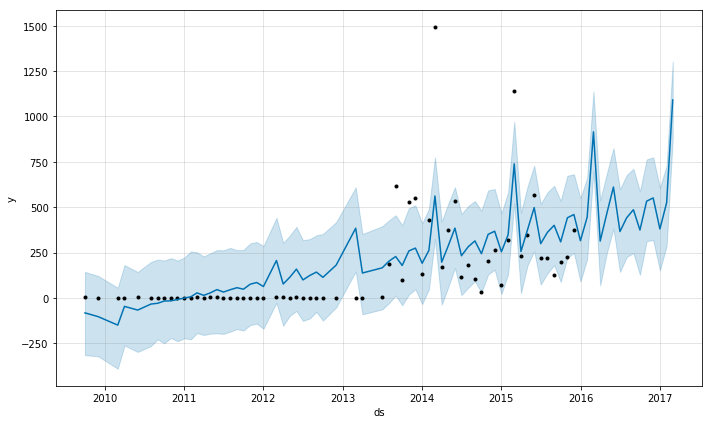

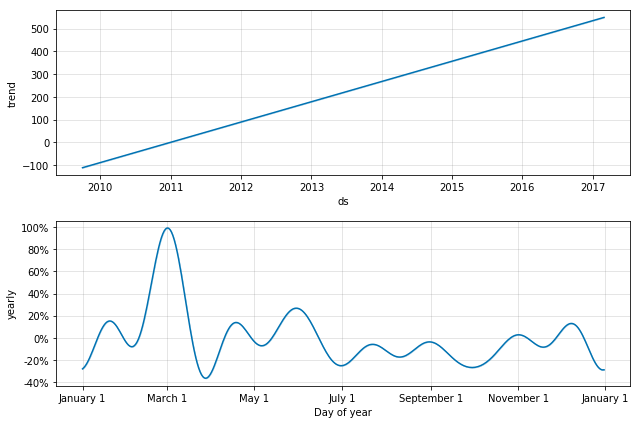

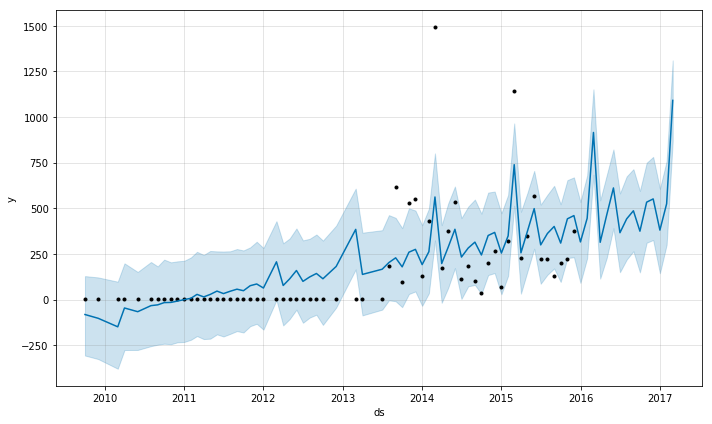

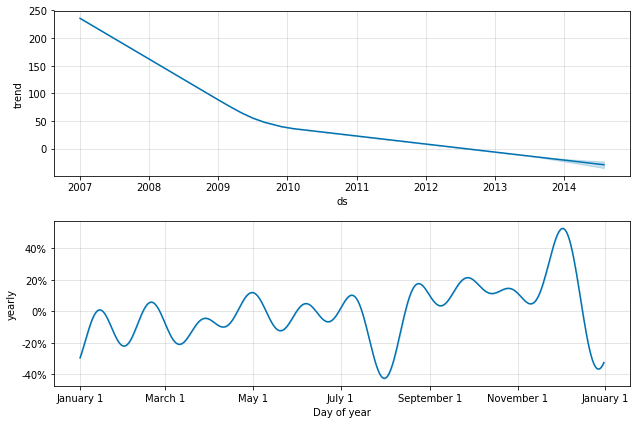

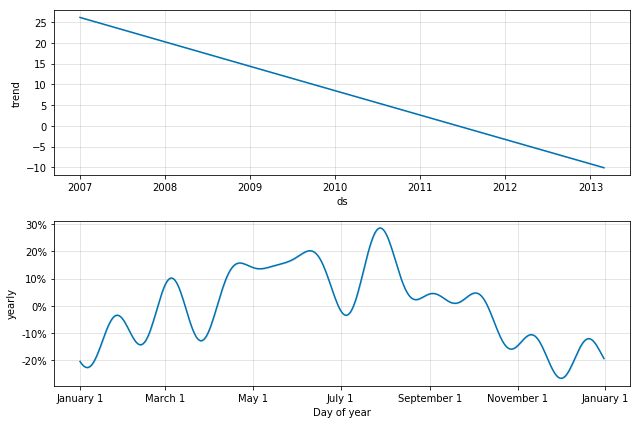

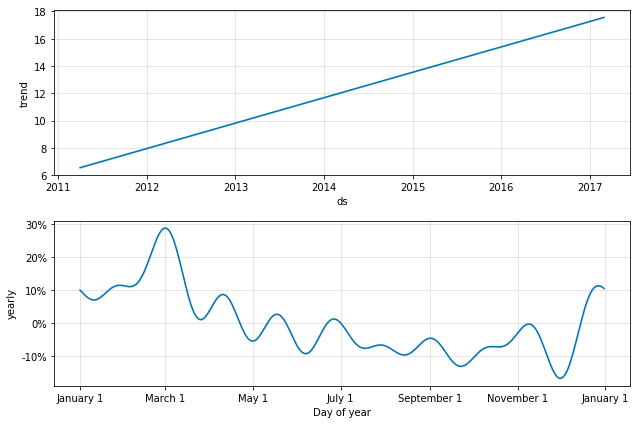

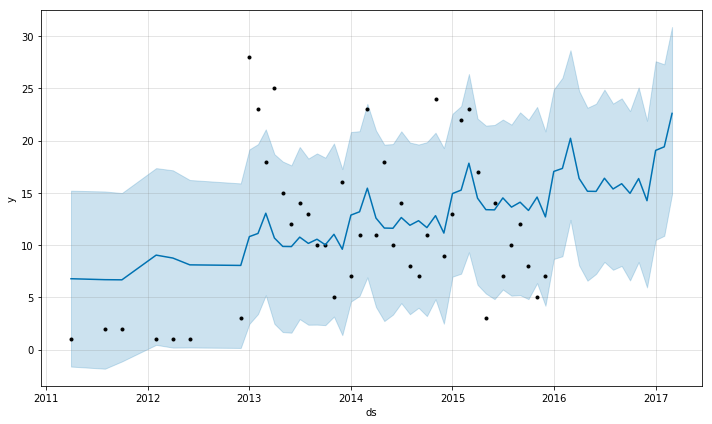

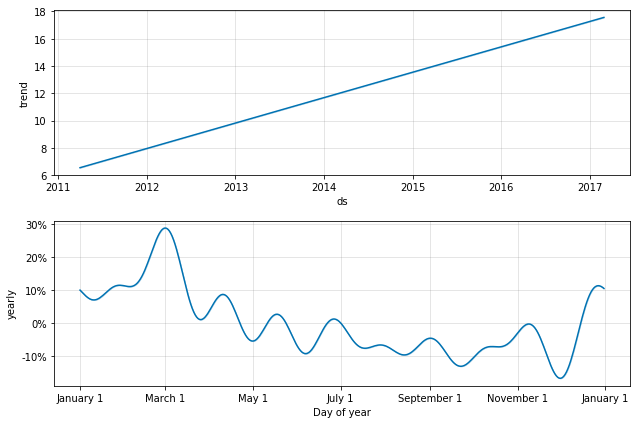

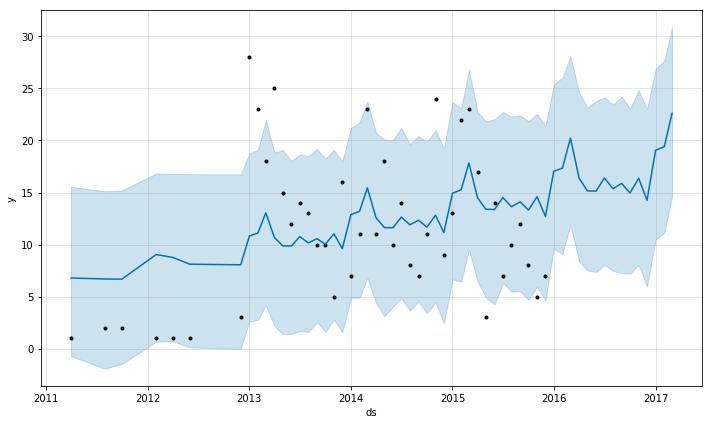

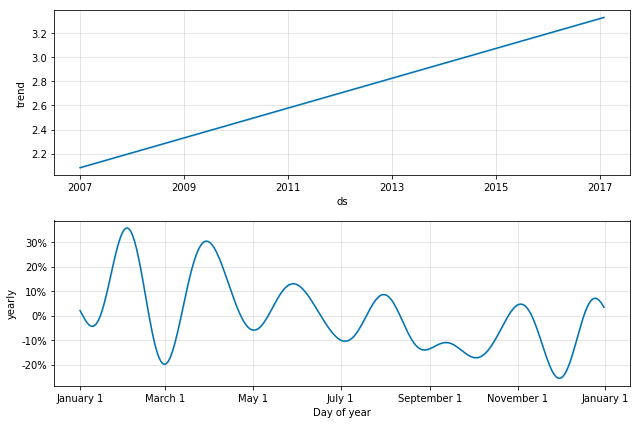

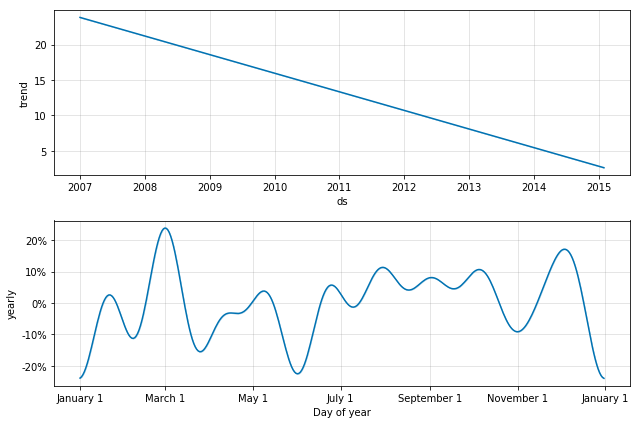

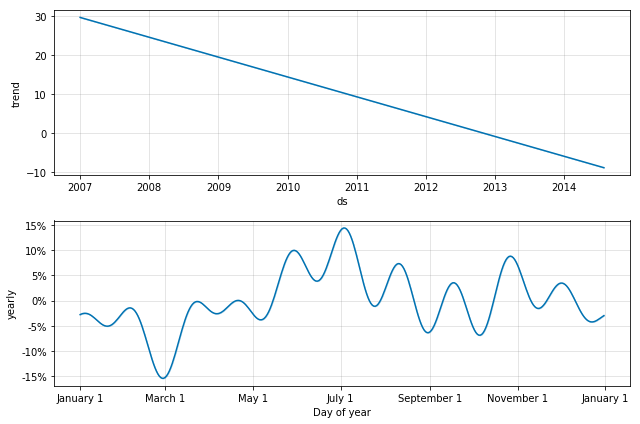

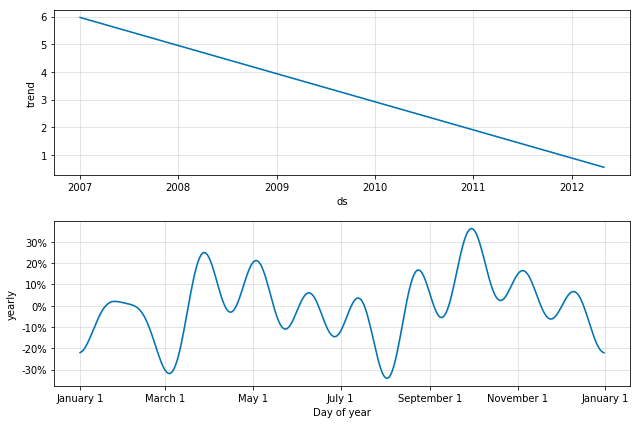

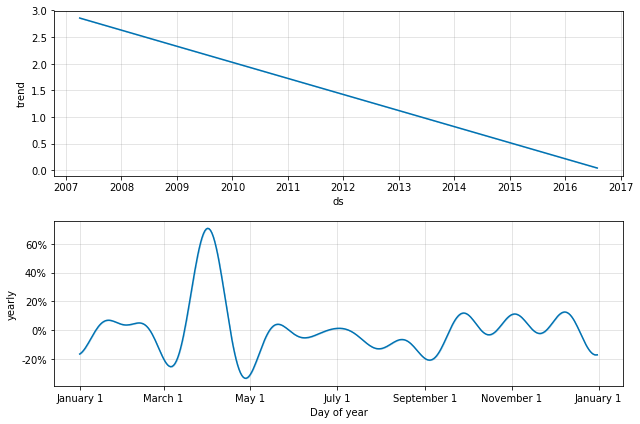

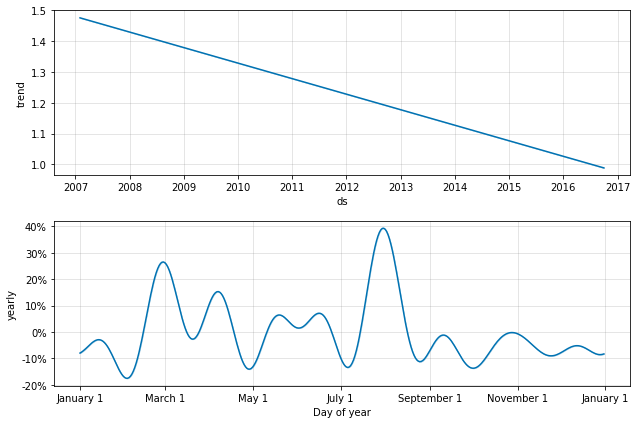

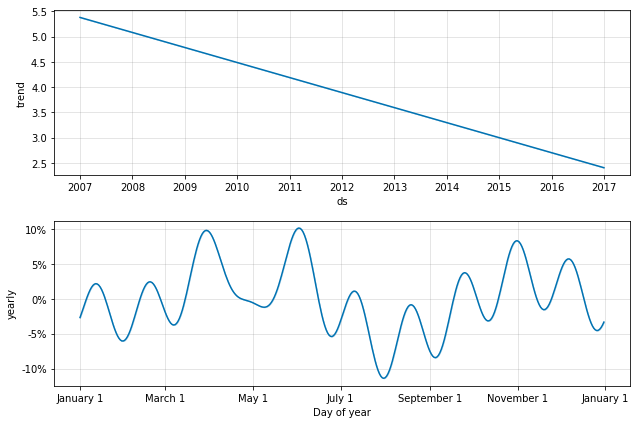

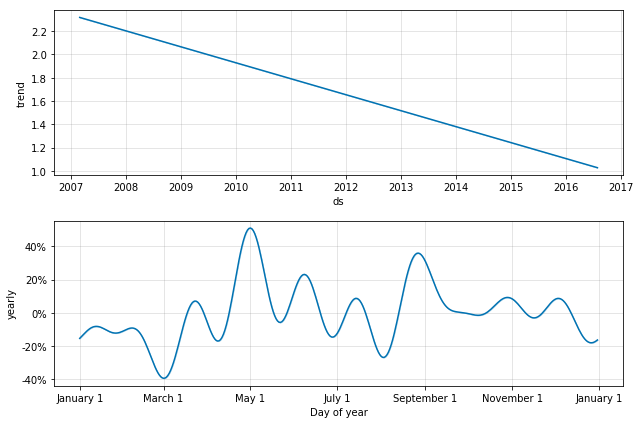

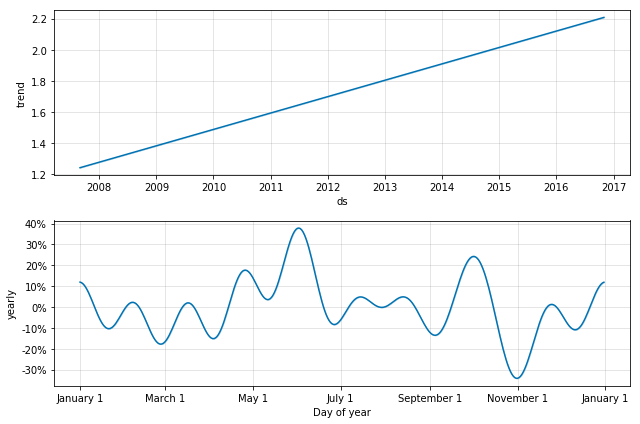

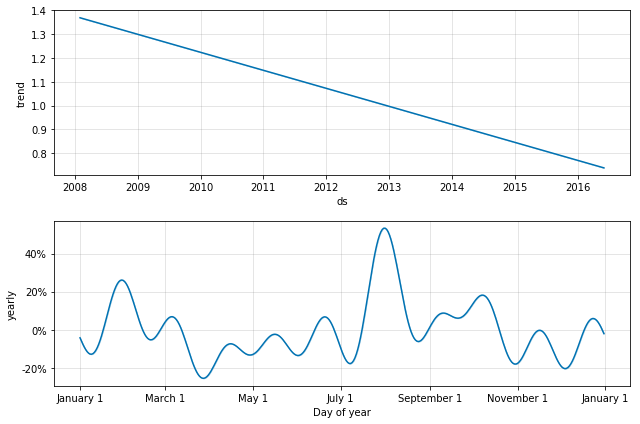

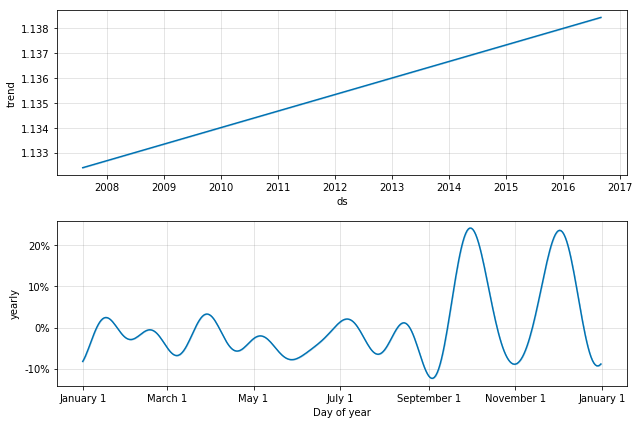

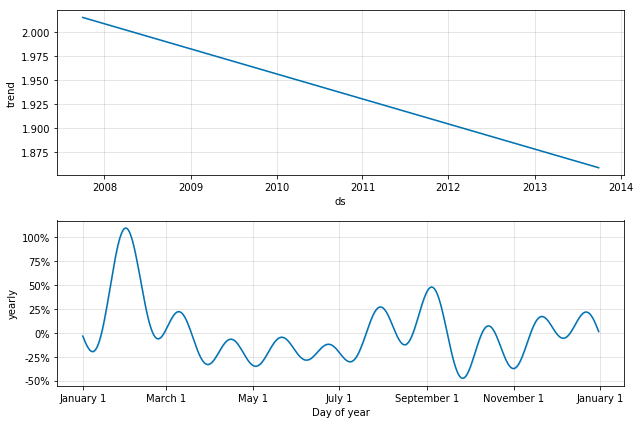

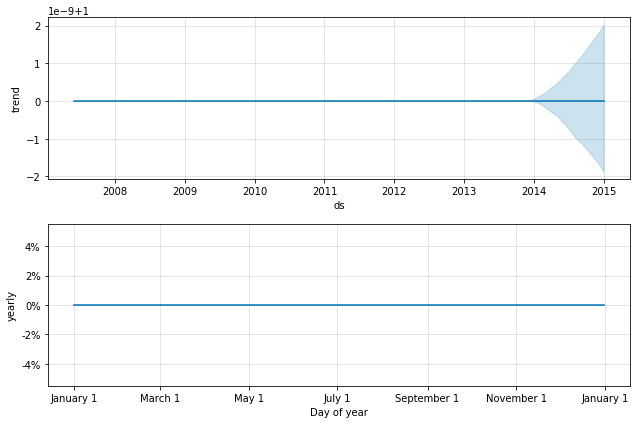

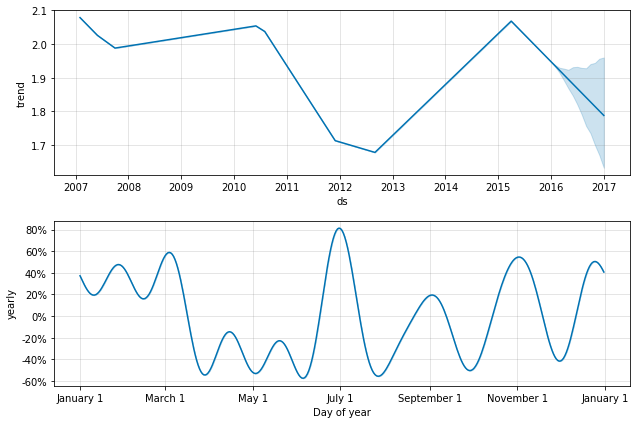

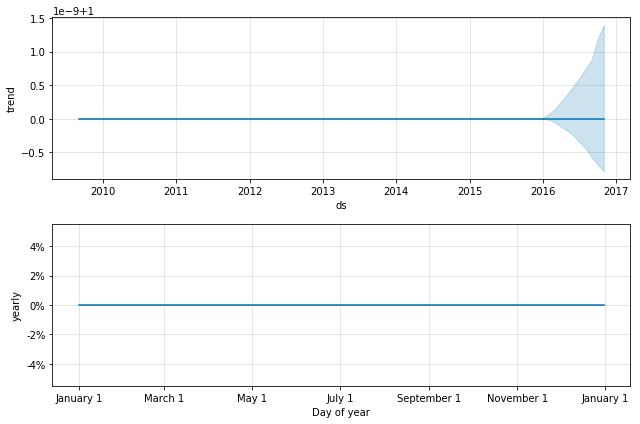

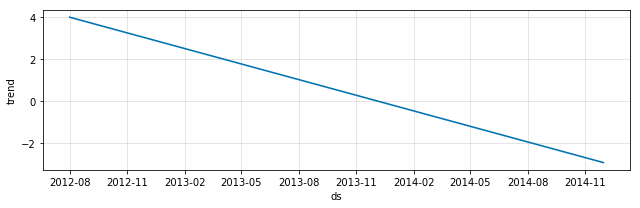

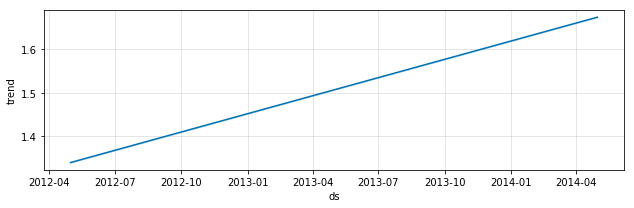

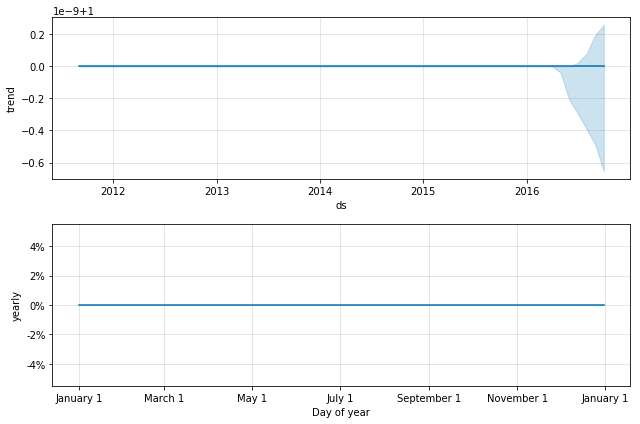

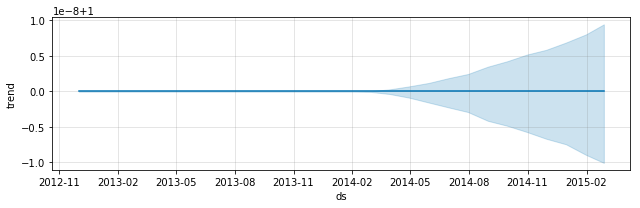

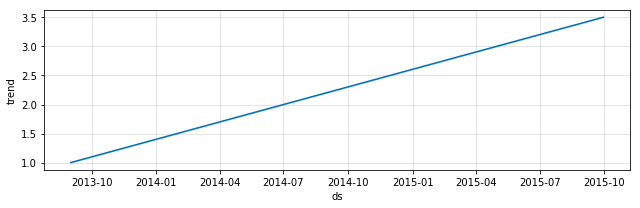

In [27]:
for x in makes :
    try :
        print('Prediction for car brand', x)
        dfx = df[df.Make.str.contains(x)]
        dfx = dfx.drop('Make',axis =1)
        dfx = dfx.groupby(['date'])['Quantity'].sum()
        dfx.head(3)
        dfx =  pd.DataFrame([dfx.index, dfx.values])
        dfx = dfx.T
        dfx.columns = ['date', 'Quantity']
        dfx['date'] = pd.to_datetime(dfx['date'])
        dfx_train = dfx.loc[dfx['date'] < '2016-01-01T00:00:00.000000000']
        dfx_test = dfx.loc[dfx['date'] >= '2016-01-01T00:00:00.000000000']
        dfx_train_chk1 = dfx_train.set_index('date')
        dfx_test = dfx_test.set_index('date')
        m = Prophet(seasonality_mode='multiplicative',seasonality_prior_scale=0.1)
        dfx_train_chk1['ds'] = dfx_train_chk1.index
        dfx_train_chk1['y']  = dfx_train_chk1.Quantity
        m.fit(dfx_train_chk1)
        future = m.make_future_dataframe(freq='M',periods = 15)
        forecast = m.predict(future)
        print('Prediction forecast graph for car brand', x)
        m.plot_components(forecast)
        print('Prediction forecast graph for car brand', x)
        y_pred = forecast
        cols222 = ['trend_lower' ,'trend_upper' ,'yhat_lower','yhat_upper', 'additive_terms' ,'additive_terms','additive_terms_upper','additive_terms_lower' ,'multiplicative_terms' ,'multiplicative_terms_lower' ,'multiplicative_terms_upper','yearly','yearly_lower' ,'yearly_upper','yhat']
        y_pred = y_pred.drop(cols222,axis=1)
        y_pred = y_pred.loc[y_pred['ds'] <= '2017-02-01T00:00:00.000000000']
        y_pred = y_pred.loc[y_pred['ds'] >= '2016-01-31T00:00:00.000000000']
        y_pred['ds'] = pd.to_datetime(y_pred.ds) + pd.to_timedelta(pd.np.ceil(1), unit="D")
        y_pred = y_pred.set_index('ds')
        rms = sqrt(mean_squared_error(dfx_test,y_pred))
        print(rms)
        print('Prediction forecast graph for car brand', x)
        fig = m.plot(forecast)
        print('Prediction forecast graph for car brand', x)
        print('the prediction for brand',x , 'ends')
        print('Prediction for car brand', x)
        dfx = df[df.Make.str.contains(x)]
        dfx = dfx.drop('Make',axis =1)
        dfx = dfx.groupby(['date'])['Quantity'].sum()
        dfx.head(3)
        dfx =  pd.DataFrame([dfx.index, dfx.values])
        dfx = dfx.T
        dfx.columns = ['date', 'Quantity']
        dfx['date'] = pd.to_datetime(dfx['date'])
        dfx_train = dfx.loc[dfx['date'] < '2016-01-01T00:00:00.000000000']
        dfx_test = dfx.loc[dfx['date'] >= '2016-01-01T00:00:00.000000000']
        dfx_train_chk1 = dfx_train.set_index('date')
        dfx_test = dfx_test.set_index('date')
        m = Prophet(seasonality_mode='multiplicative',seasonality_prior_scale=0.1)
        dfx_train_chk1['ds'] = dfx_train_chk1.index
        dfx_train_chk1['y']  = dfx_train_chk1.Quantity
        m.fit(dfx_train_chk1)
        future = m.make_future_dataframe(freq='M',periods = 15)
        forecast = m.predict(future)
        print('Prediction forecast graph for car brand', x)
        m.plot_components(forecast)
        print('Prediction forecast graph for car brand', x)
        y_pred = forecast
        cols222 = ['trend_lower' ,'trend_upper' ,'yhat_lower','yhat_upper', 'additive_terms' ,'additive_terms','additive_terms_upper','additive_terms_lower' ,'multiplicative_terms' ,'multiplicative_terms_lower' ,'multiplicative_terms_upper','yearly','yearly_lower' ,'yearly_upper','yhat']
        y_pred = y_pred.drop(cols222,axis=1)
        y_pred = y_pred.loc[y_pred['ds'] <= '2017-02-01T00:00:00.000000000']
        y_pred = y_pred.loc[y_pred['ds'] >= '2016-01-31T00:00:00.000000000']
        y_pred['ds'] = pd.to_datetime(y_pred.ds) + pd.to_timedelta(pd.np.ceil(1), unit="D")
        y_pred = y_pred.set_index('ds')
        rms = sqrt(mean_squared_error(dfx_test,y_pred))
        print(rms)
        print('Prediction forecast graph for car brand', x)
        fig = m.plot(forecast)
        print('Prediction forecast graph for car brand', x)
        print('the prediction for brand',x , 'ends')
    except ValueError, e:
        continue
    except IndexError, i:
        continue
    except TypeError, t:
        continue
    except KeyError, k:
        continue